# Dataset Information



Given a set of features extracted from the shape of the beans in images and  it's required to predict the class of a bean given some features about its shape.
There are 7 bean types in this dataset.

**Data fields**
- ID - an ID for this instance
- Area - (A), The area of a bean zone and the number of pixels within its boundaries.
- Perimeter - (P), Bean circumference is defined as the length of its border.
- MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio - (K), Defines the relationship between L and l.
- Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
- ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
- Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
- Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
- Compactness - (CO), Measures the roundness of an object: Ed/L
- ShapeFactor1 - (SF1)
- ShapeFactor2 - (SF2)
- ShapeFactor3 - (SF3)
- ShapeFactor4 - (SF4)
- y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.


<img src= "https://www.thespruceeats.com/thmb/eeIti36pfkoNBaipXrTHLjIv5YA=/1888x1416/smart/filters:no_upscale()/DriedBeans-56f6c2c43df78c78418c3b46.jpg" alt ="Titanic" style='width: 800px;height:400px'>

# Import Required Libraries

In [ ]:
# !pip install catboost

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
#####################################################################
# for visualizations
from pandas import plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
###########################################################
%config Completer.use_jedi=False
pd.set_option("display.max_columns", None)

# ignore the warnings
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)

# for path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.


# Read Train and Test Data

In [ ]:
# dataset_path = '/kaggle/input/dry-beans-classification-iti-ai-pro-intake01/'
# dfTrainO = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
# dfTestO = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
# print("The shape of the dataset is {}.\n\n".format(dfTrainO.shape))
# print("The shape of the dataset is {}.\n\n".format(dfTestO.shape))
# dfTrainO.head()

In [ ]:
dfTrainO=pd.read_csv("train.csv")
print('---'*30)
print('Train Head')
print('---'*30)
display(dfTrainO.head())
dfTestO=pd.read_csv("test.csv")
print('---'*30)
print('Test Head')
print('---'*30)
display(dfTestO.head())

------------------------------------------------------------------------------------------
Train Head
------------------------------------------------------------------------------------------


ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0   0  58238    971.303       397.202654       186.945510      2.124697   
1   1  44515    757.601       265.590470       213.967453      1.241266   
2   2  31662    653.783       239.902428       168.421505      1.424417   
3   3  38778    734.020       268.446281       184.061923      1.458456   
4   4  42530    775.403       281.212824       193.236878      1.455275   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1      0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2      0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3      0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4      0.726511       43028     232.703412  0.729816  0.988426   0.888895   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.685561      0.006820      0.000929      0.469994      0.998595   
1     0.896387      0.005966      0.002376      0.803510      0.997370   
2     0.836931      0.007577      0.002293      0.700453      0.997737   
3     0.827733      0.006923      0.002005      0.685142      0.999250   
4     0.827499      0.006612      0.001912      0.684755      0.996507   

          y  
0     HOROZ  
1     SEKER  
2  DERMASON  
3  DERMASON  
4      SIRA

------------------------------------------------------------------------------------------
Test Head
------------------------------------------------------------------------------------------


ID    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  10834   57659    955.434       387.757607       196.625782      1.972059   
1  10835   28772    630.362       229.990785       159.609367      1.440960   
2  10836   54677    911.022       308.853903       226.398571      1.364204   
3  10837   24827    578.304       214.192699       147.788172      1.449322   
4  10838  141850   1432.847       524.923471       346.910920      1.513136   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.861896       60188     270.949661  0.620790  0.957982   0.793735   
1      0.719993       29127     191.399185  0.767458  0.987812   0.909913   
2      0.680198       55858     263.850182  0.753013  0.978857   0.827860   
3      0.723831       25121     177.794033  0.716508  0.988297   0.932871   
4      0.750492      143680     424.981211  0.804617  0.987263   0.868240   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.698760      0.006725      0.000989      0.488266      0.962889  
1     0.832204      0.007994      0.002365      0.692563      0.997956  
2     0.854288      0.005649      0.001856      0.729808      0.995607  
3     0.830066      0.008627      0.002526      0.689009      0.998596  
4     0.809606      0.003701      0.000981      0.655462      0.991803

__________________________________________________

In [ ]:
print(dfTrainO.shape)

print(dfTestO.shape)

(10834, 18)
(2709, 17)


In [ ]:
len(dfTestO)/(len(dfTrainO)+len(dfTestO))

0.20002953555342243

In [ ]:
print(dfTrainO.info())
print("***"*20)
print(dfTestO.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [ ]:
# colsTrain=dfTrainO.columns[dfTrainO.dtypes=='float'].to_list()
# colsTest =dfTestO.columns[dfTestO.dtypes=='float'].to_list()

# colsTrain
# colsTest

In [ ]:
# dfTrainO[colsTrain] = dfTrainO[colsTrain].round(2)
# dfTestO[colsTest] = dfTestO[colsTest].round(2)

In [ ]:
dfTrainO

ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  \
0          0  58238    971.303       397.202654       186.945510   
1          1  44515    757.601       265.590470       213.967453   
2          2  31662    653.783       239.902428       168.421505   
3          3  38778    734.020       268.446281       184.061923   
4          4  42530    775.403       281.212824       193.236878   
...      ...    ...        ...              ...              ...   
10829  10829  37777    716.007       250.174662       192.704033   
10830  10830  32187    667.621       247.778775       165.786862   
10831  10831  81837   1095.937       433.838186       241.527026   
10832  10832  48212    826.362       309.639462       199.285811   
10833  10833  28026    610.943       215.446569       165.740377   

       AspectRation  Eccentricity  ConvexArea  EquivDiameter    Extent  \
0          2.124697      0.882317       58977     272.306674  0.604756   
1          1.241266      0.592420       44780     238.071960  0.771745   
2          1.424417      0.712136       32034     200.781748  0.801407   
3          1.458456      0.727925       39208     222.201897  0.766137   
4          1.455275      0.726511       43028     232.703412  0.729816   
...             ...           ...         ...            ...       ...   
10829      1.298233      0.637708       38174     219.315230  0.770519   
10830      1.494562      0.743179       32582     202.439525  0.731805   
10831      1.796230      0.830699       82554     322.797312  0.771996   
10832      1.553746      0.765357       48777     247.760822  0.677002   
10833      1.299904      0.638903       28302     188.901592  0.776688   

       Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  \
0      0.987470   0.775723     0.685561      0.006820      0.000929   
1      0.994082   0.974620     0.896387      0.005966      0.002376   
2      0.988387   0.930853     0.836931      0.007577      0.002293   
3      0.989033   0.904439     0.827733      0.006923      0.002005   
4      0.988426   0.888895     0.827499      0.006612      0.001912   
...         ...        ...          ...           ...           ...   
10829  0.989600   0.925983     0.876648      0.006622      0.002413   
10830  0.987877   0.907466     0.817017      0.007698      0.002116   
10831  0.991315   0.856226     0.744050      0.005301      0.001002   
10832  0.988417   0.887206     0.800159      0.006422      0.001624   
10833  0.990248   0.943560     0.876791      0.007687      0.002802   

       ShapeFactor3  ShapeFactor4         y  
0          0.469994      0.998595     HOROZ  
1          0.803510      0.997370     SEKER  
2          0.700453      0.997737  DERMASON  
3          0.685142      0.999250  DERMASON  
4          0.684755      0.996507      SIRA  
...             ...           ...       ...  
10829      0.768513      0.997708     SEKER  
10830      0.667517      0.997646  DERMASON  
10831      0.553610      0.994412      CALI  
10832      0.640255      0.994793      SIRA  
10833      0.768762      0.999317  DERMASON  

[10834 rows x 18 columns]

In [ ]:
dfTestO

ID    Area  Perimeter  MajorAxisLength  MinorAxisLength  \
0     10834   57659    955.434       387.757607       196.625782   
1     10835   28772    630.362       229.990785       159.609367   
2     10836   54677    911.022       308.853903       226.398571   
3     10837   24827    578.304       214.192699       147.788172   
4     10838  141850   1432.847       524.923471       346.910920   
...     ...     ...        ...              ...              ...   
2704  13538   66833   1018.336       400.397077       214.346215   
2705  13539   40572    725.331       250.714014       206.471935   
2706  13540   61226   1008.378       408.227467       199.385082   
2707  13541   34238    698.847       255.829224       170.867099   
2708  13542   49175    828.597       310.354804       202.329323   

      AspectRation  Eccentricity  ConvexArea  EquivDiameter    Extent  \
0         1.972059      0.861896       60188     270.949661  0.620790   
1         1.440960      0.719993       29127     191.399185  0.767458   
2         1.364204      0.680198       55858     263.850182  0.753013   
3         1.449322      0.723831       25121     177.794033  0.716508   
4         1.513136      0.750492      143680     424.981211  0.804617   
...            ...           ...         ...            ...       ...   
2704      1.867992      0.844640       67787     291.709476  0.759604   
2705      1.214276      0.567264       40900     227.283688  0.767479   
2706      2.047432      0.872611       63901     279.204879  0.611648   
2707      1.497241      0.744255       34724     208.789788  0.724890   
2708      1.533909      0.758280       49668     250.223010  0.798166   

      Solidity  roundness  Compactness  ShapeFactor1  ShapeFactor2  \
0     0.957982   0.793735     0.698760      0.006725      0.000989   
1     0.987812   0.909913     0.832204      0.007994      0.002365   
2     0.978857   0.827860     0.854288      0.005649      0.001856   
3     0.988297   0.932871     0.830066      0.008627      0.002526   
4     0.987263   0.868240     0.809606      0.003701      0.000981   
...        ...        ...          ...           ...           ...   
2704  0.985927   0.809876     0.728550      0.005991      0.001041   
2705  0.991980   0.969089     0.906546      0.006179      0.002574   
2706  0.958138   0.756657     0.683944      0.006668      0.000900   
2707  0.986004   0.880956     0.816130      0.007472      0.002045   
2708  0.990074   0.900052     0.806248      0.006311      0.001645   

      ShapeFactor3  ShapeFactor4  
0         0.488266      0.962889  
1         0.692563      0.997956  
2         0.729808      0.995607  
3         0.689009      0.998596  
4         0.655462      0.991803  
...            ...           ...  
2704      0.530786      0.991504  
2705      0.821825      0.997923  
2706      0.467780      0.957748  
2707      0.666067      0.997263  
2708      0.650036      0.997096  

[2709 rows x 17 columns]

In [ ]:
dfTrainO.describe().T

count          mean           std           min  \
ID               10834.0   5416.500000   3127.650742      0.000000   
Area             10834.0  53095.675189  29542.542580  20420.000000   
Perimeter        10834.0    855.274892    214.991122    524.932000   
MajorAxisLength  10834.0    320.036169     85.961630    183.601165   
MinorAxisLength  10834.0    202.410342     45.113965    129.576207   
AspectRation     10834.0      1.581294      0.244314      1.024868   
Eccentricity     10834.0      0.750588      0.091481      0.218951   
ConvexArea       10834.0  53816.205926  29999.710739  20684.000000   
EquivDiameter    10834.0    253.123583     59.433080    161.243764   
Extent           10834.0      0.749937      0.048949      0.555315   
Solidity         10834.0      0.987152      0.004626      0.919246   
roundness        10834.0      0.873647      0.059344      0.489618   
Compactness      10834.0      0.800244      0.061228      0.645368   
ShapeFactor1     10834.0      0.006559      0.001127      0.002856   
ShapeFactor2     10834.0      0.001718      0.000593      0.000564   
ShapeFactor3     10834.0      0.644139      0.098268      0.416499   
ShapeFactor4     10834.0      0.995083      0.004306      0.947687   

                          25%           50%           75%            max  
ID                2708.250000   5416.500000   8124.750000   10833.000000  
Area             36343.500000  44645.000000  61295.000000  254616.000000  
Perimeter          703.601250    793.739500    975.517500    1985.370000  
MajorAxisLength    253.501071    296.377365    376.068399     738.860153  
MinorAxisLength    175.927024    192.525040    217.315195     450.926187  
AspectRation         1.432985      1.550761      1.703029       2.388873  
Eccentricity         0.716250      0.764314      0.809450       0.908167  
ConvexArea       36731.250000  45148.000000  62251.500000  263261.000000  
EquivDiameter      215.113880    238.419335    279.362162     569.374358  
Extent               0.718778      0.760141      0.786871       0.866195  
Solidity             0.985627      0.988290      0.990014       0.994677  
roundness            0.833479      0.883472      0.916883       0.990685  
Compactness          0.763378      0.801428      0.834068       0.987303  
ShapeFactor1         0.005888      0.006643      0.007268       0.009897  
ShapeFactor2         0.001161      0.001700      0.002169       0.003665  
ShapeFactor3         0.582747      0.642287      0.695670       0.974767  
ShapeFactor4         0.993690      0.996397      0.997895       0.999733

**Features like:** (Eccentricity , Extent ,Solidity ,roundness ,Compactness ,and shapeFactor3,4 ) **ranges between (0 and 1)**

**Features Like:** (shapeFactor1,2) **Ranges in 0.001**

**On the other side , there are other features like:**
- (Area) ranges between (20420 and 254616 )
- (ConvexArea) ranges between (20684 and 263261 )
- (Perimeter) ranges between (524 and 1986)
- (MajorAxisLength) ranges between (183 and 738)
- (MinorAxisLength) ranges between (129 and 451)
- (EquivDiameter) ranges between (161 and 570)
- (AspectRation) ranges between (1 and 2.4)


When a dataset has values of different columns at different scales, it gets tough to analyze the trends and patterns , so we need to make sure that all the columns have a significant difference in their scales, and they can be modified in such a way that all those values fall into the same scale. This process is called Scaling.

In [ ]:
dfTestO.describe().T

count          mean           std           min  \
ID               2709.0  12188.000000    782.165264  10834.000000   
Area             2709.0  52859.636028  28788.904724  20548.000000   
Perimeter        2709.0    853.867669    213.681592    524.736000   
MajorAxisLength  2709.0    319.333439     85.210636    183.965251   
MinorAxisLength  2709.0    202.185268     44.809321    122.512653   
AspectRation     2709.0      1.580199      0.248980      1.036423   
Eccentricity     2709.0      0.749225      0.093357      0.262774   
ConvexArea       2709.0  53575.145441  29218.902099  20825.000000   
EquivDiameter    2709.0    252.676206     58.813187    161.748342   
Extent           2709.0      0.749399      0.048909      0.574040   
Solidity         2709.0      0.987153      0.004745      0.943559   
roundness        2709.0      0.873770      0.059601      0.576029   
Compactness      2709.0      0.800783      0.062408      0.640577   
ShapeFactor1     2709.0      0.006568      0.001141      0.002778   
ShapeFactor2     2709.0      0.001726      0.000604      0.000602   
ShapeFactor3     2709.0      0.645147      0.100193      0.410339   
ShapeFactor4     2709.0      0.995062      0.004508      0.949990   

                          25%           50%           75%            max  
ID               11511.000000  12188.000000  12865.000000   13542.000000  
Area             36144.000000  44397.000000  61626.000000  231066.000000  
Perimeter          700.485000    794.894000    979.260000    1845.855000  
MajorAxisLength    251.623237    297.858034    376.701298     713.967282  
MinorAxisLength    175.374226    192.367881    216.233028     460.198497  
AspectRation         1.425448      1.548174      1.706945       2.430306  
Eccentricity         0.712636      0.763403      0.810425       0.911423  
ConvexArea       36504.000000  45003.000000  62568.000000  232903.000000  
EquivDiameter      214.522656    237.756211    280.115441     542.404248  
Extent               0.718512      0.758598      0.786651       0.842382  
Solidity             0.985859      0.988277      0.990033       0.994378  
roundness            0.832856      0.883544      0.917331       0.984966  
Compactness          0.762830      0.802013      0.835676       0.981611  
ShapeFactor1         0.005905      0.006646      0.007282       0.010451  
ShapeFactor2         0.001151      0.001701      0.002190       0.003419  
ShapeFactor3         0.581910      0.643224      0.698355       0.963560  
ShapeFactor4         0.993791      0.996386      0.997851       0.999707

In [ ]:
dfTrainO.describe(include=object)

y
count      10834
unique         7
top     DERMASON
freq        2837

In [ ]:
dfTrainO['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

# Data Visualization
**Heatmap**

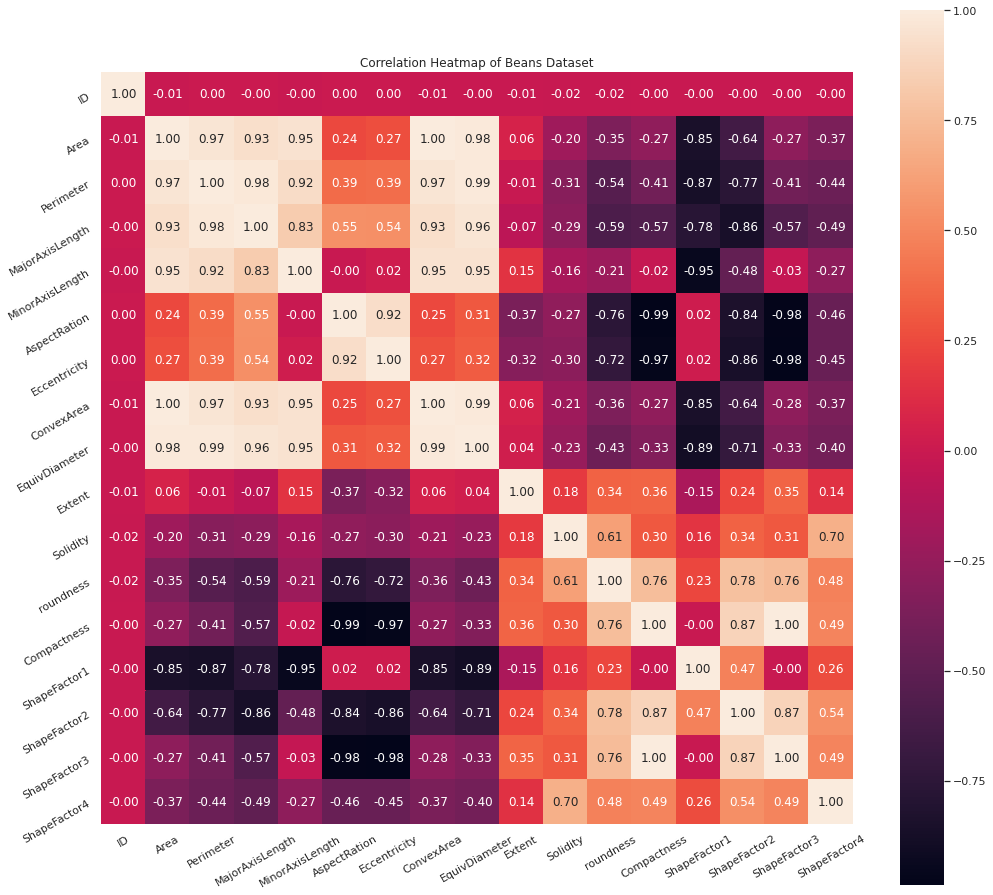

In [ ]:
corr_matrix = dfTrainO.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Beans Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [ ]:
abs(dfTrainO.drop(columns="ID").corr())

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966881         0.933198         0.952536   
Perimeter        0.966881   1.000000         0.977830         0.915162   
MajorAxisLength  0.933198   0.977830         1.000000         0.830452   
MinorAxisLength  0.952536   0.915162         0.830452         1.000000   
AspectRation     0.243893   0.386119         0.548912         0.003095   
Eccentricity     0.268565   0.390878         0.539787         0.024388   
ConvexArea       0.999940   0.967823         0.933934         0.952268   
EquivDiameter    0.984987   0.991439         0.962754         0.949832   
Extent           0.061387   0.013889         0.070935         0.152157   
Solidity         0.200078   0.307817         0.285916         0.160567   
roundness        0.354127   0.543906         0.589910         0.211275   
Compactness      0.270134   0.407622         0.566905         0.021042   
ShapeFactor1     0.848371   0.866250         0.777222         0.947040   
ShapeFactor2     0.640619   0.768104         0.858387         0.476659   
ShapeFactor3     0.274081   0.409079         0.566625         0.025152   
ShapeFactor4     0.365265   0.439272         0.491591         0.273554   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.243893      0.268565    0.999940       0.984987   
Perimeter            0.386119      0.390878    0.967823       0.991439   
MajorAxisLength      0.548912      0.539787    0.933934       0.962754   
MinorAxisLength      0.003095      0.024388    0.952268       0.949832   
AspectRation         1.000000      0.924040    0.245408       0.305557   
Eccentricity         0.924040      1.000000    0.270283       0.319497   
ConvexArea           0.245408      0.270283    1.000000       0.985223   
EquivDiameter        0.305557      0.319497    0.985223       1.000000   
Extent               0.372383      0.319550    0.059711       0.035291   
Solidity             0.266038      0.295614    0.209552       0.234767   
roundness            0.762150      0.716765    0.358655       0.432327   
Compactness          0.987664      0.970173    0.271930       0.329457   
ShapeFactor1         0.019197      0.015644    0.848345       0.893598   
ShapeFactor2         0.837526      0.859207    0.642119       0.714397   
ShapeFactor3         0.978550      0.980946    0.275901       0.332067   
ShapeFactor4         0.456479      0.453895    0.371420       0.402038   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.061387  0.200078   0.354127     0.270134      0.848371   
Perimeter        0.013889  0.307817   0.543906     0.407622      0.866250   
MajorAxisLength  0.070935  0.285916   0.589910     0.566905      0.777222   
MinorAxisLength  0.152157  0.160567   0.211275     0.021042      0.947040   
AspectRation     0.372383  0.266038   0.762150     0.987664      0.019197   
Eccentricity     0.319550  0.295614   0.716765     0.970173      0.015644   
ConvexArea       0.059711  0.209552   0.358655     0.271930      0.848345   
EquivDiameter    0.035291  0.234767   0.432327     0.329457      0.893598   
Extent           1.000000  0.180843   0.341669     0.355279      0.147888   
Solidity         0.180843  1.000000   0.614744     0.301718      0.158452   
roundness        0.341669  0.614744   1.000000     0.763130      0.232067   
Compactness      0.355279  0.301718   0.763130     1.000000      0.004101   
ShapeFactor1     0.147888  0.158452   0.232067     0.004101      1.000000   
ShapeFactor2     0.235020  0.343114   0.776929     0.868571      0.474601   
ShapeFactor3     0.348442  0.305648   0.758101     0.998684      0.003162   
ShapeFactor4     0.142275  0.695040   0.479108     0.490530      0.257126   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                 0.640619      0.274081      0.365265  
Perimeter            0.768104      0.409079      0.439272  
MajorAxisLeng

From this correlation matrix we can exctract features that are strongly correlated like : 
- Area
- Perimeter
- MajorAxisLength
- MinorAxisLength
- ConvexArea
- EquivDiameter
- ShapeFactor1

Features to be drobbed : 

- ShapeFactor3
- Compactness
- AspectRation
- Area
- MajorAxisLength
- MinorAxisLength
- ConvexArea
- EquivDiameter
- ShapeFactor1

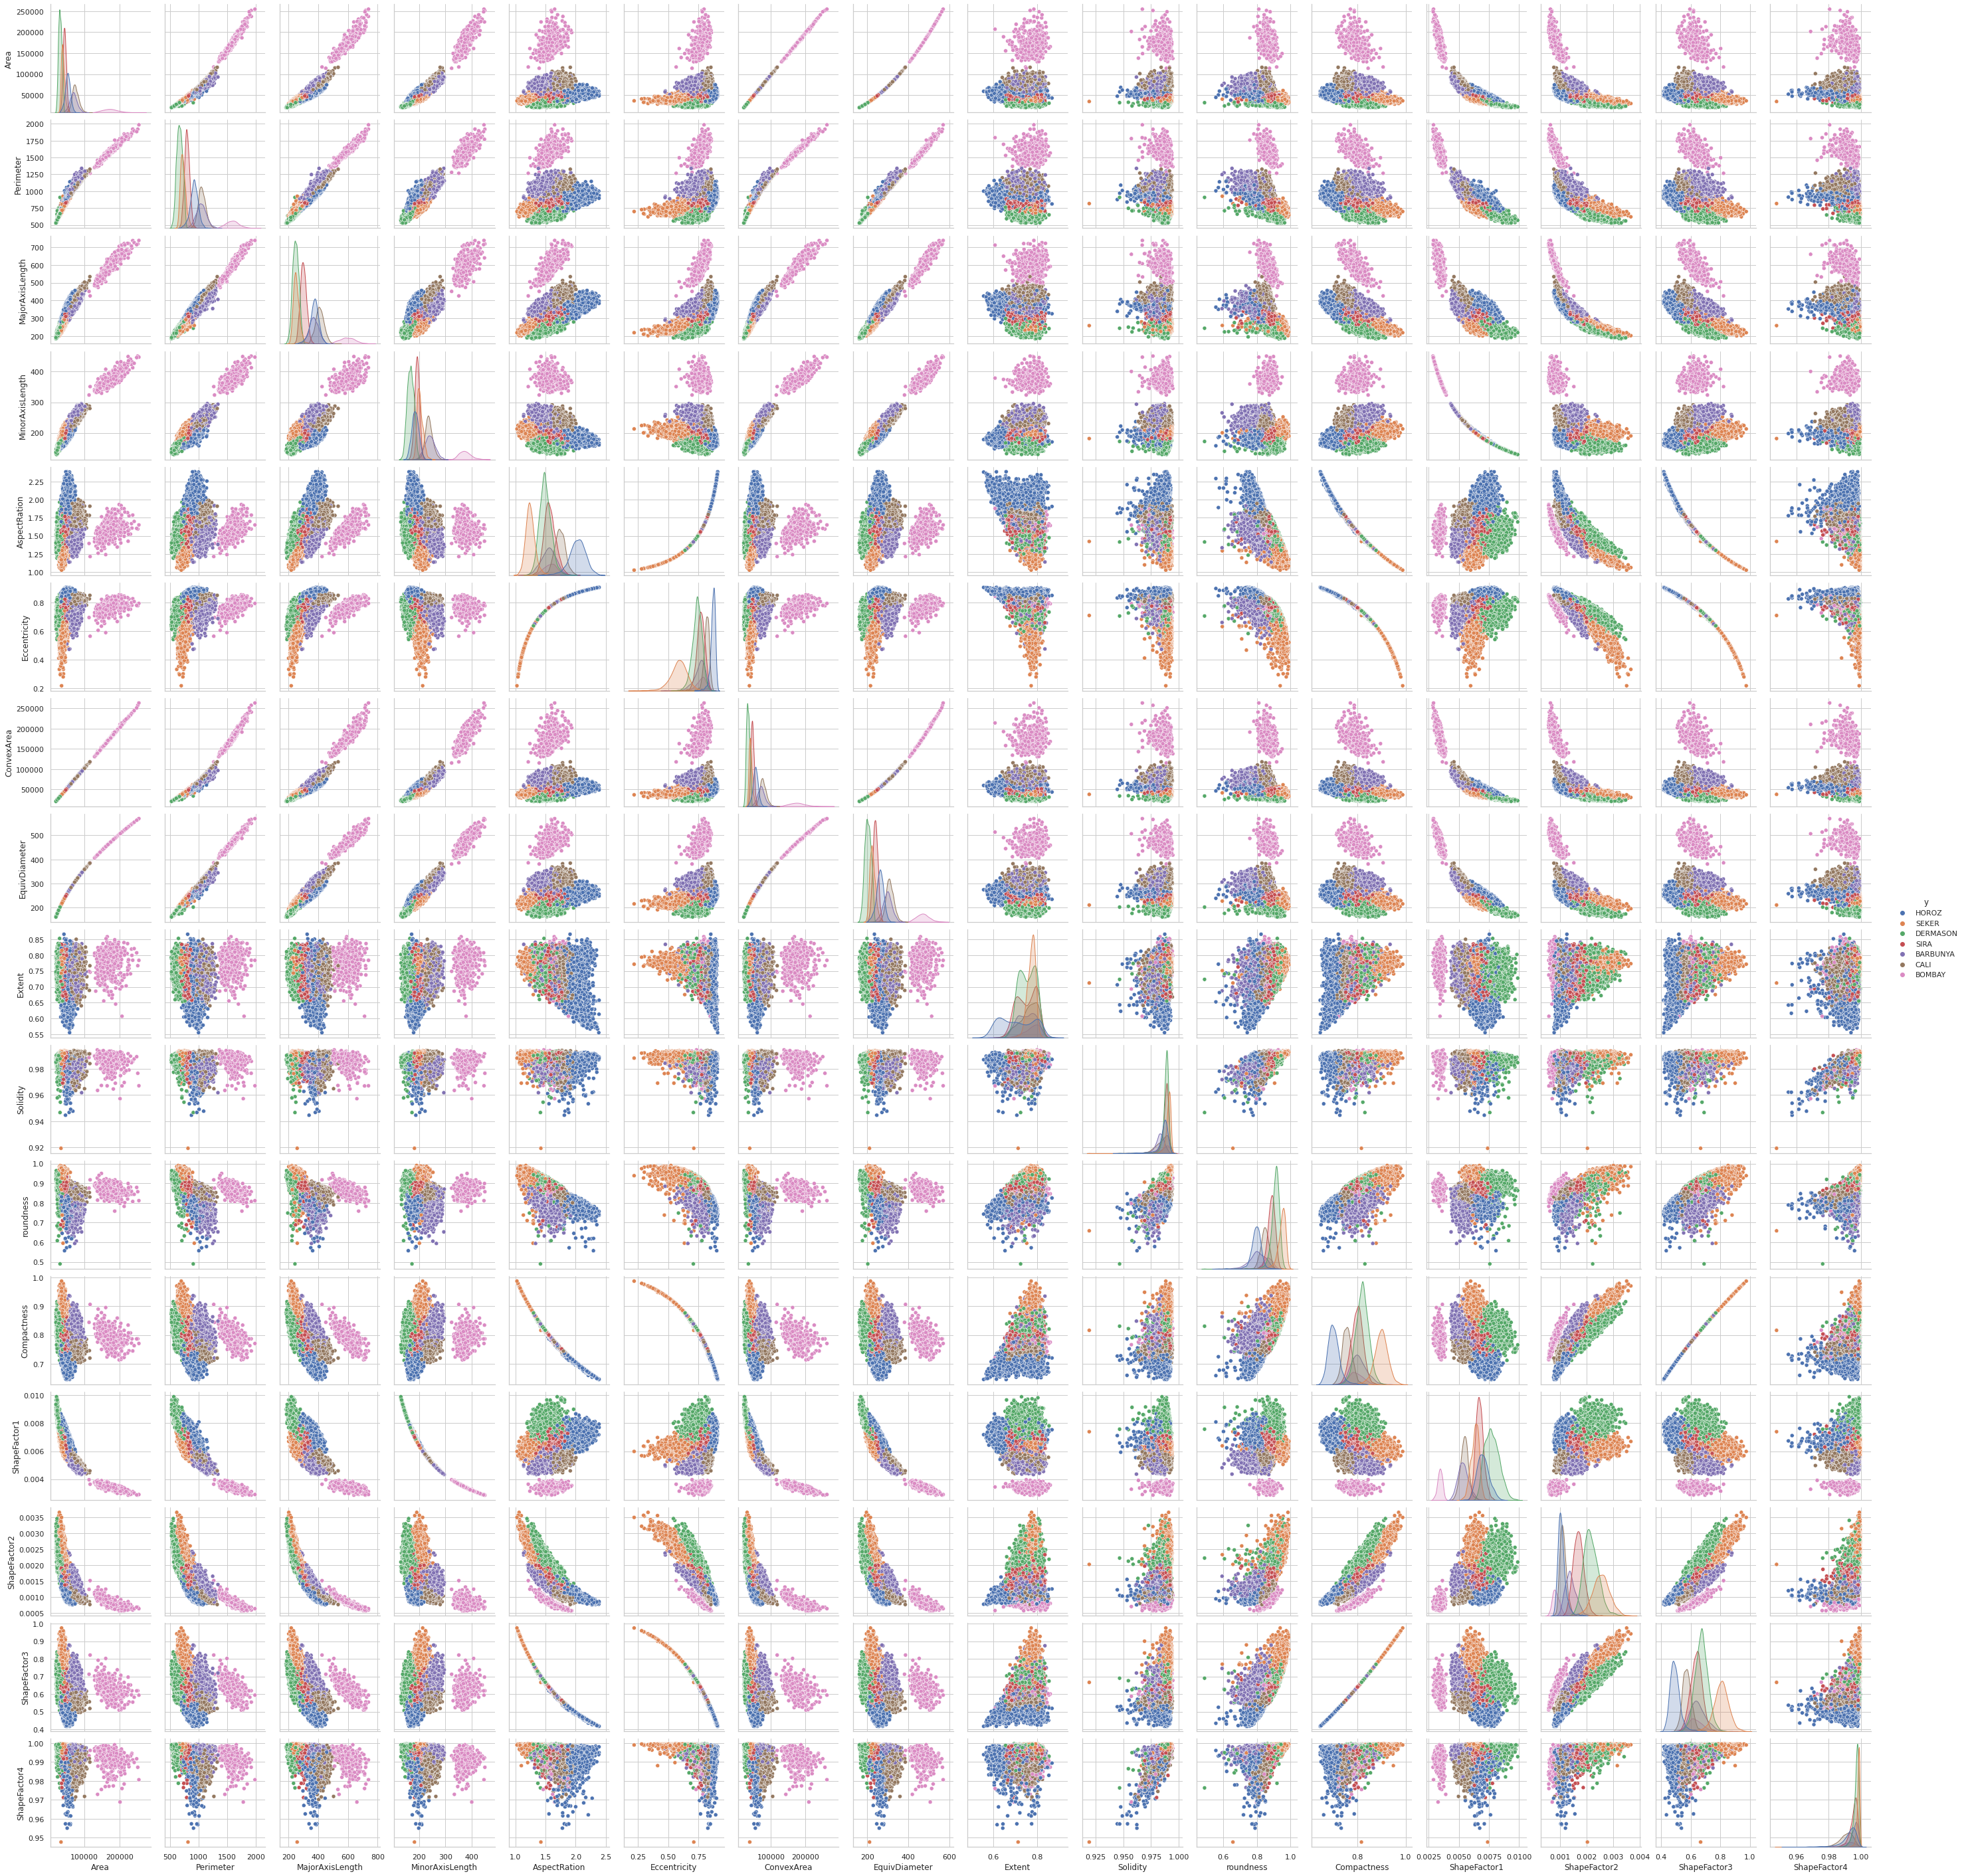

In [ ]:
Strongly_corr_features = dfTrainO.drop(columns="ID")
Strongly_corr_features.head()
sns.set_theme(style="whitegrid")
sns.pairplot(Strongly_corr_features, hue="y")

**From the graph above, Linear and log relations can be detected.**

**Next step will be Detecting how Beans classes can be effected by many features ..**

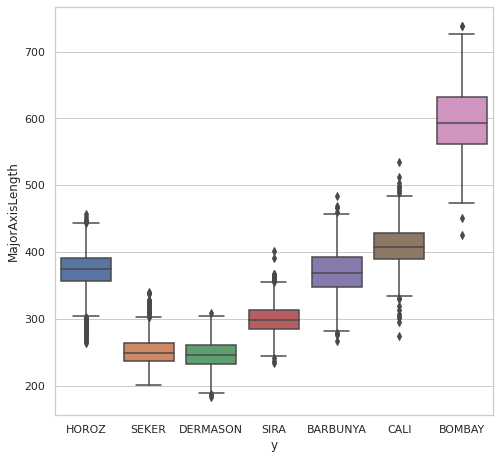

In [ ]:
sns.boxplot(x="y", y="MajorAxisLength", data=dfTrainO)

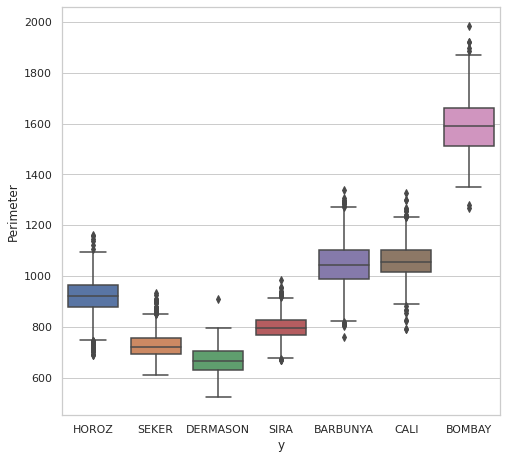

In [ ]:
sns.boxplot(x="y", y="Perimeter", data=dfTrainO)

- A perimeter is  a path that encompasses/surrounds/outlines a shape or its length. 'Wikipedia'
- The above graph shows that (BOMBAY) has the highest perimeter

In [ ]:
dfTrainNEW=dfTrainO.copy()

In [ ]:
dfTrainNEW.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'y'],
      dtype='object')

In [ ]:
dfTestNEW=dfTestO.copy()

# Value Counts and Uniques Equations

In [ ]:
def ValueCounts(df):
    for c in df.columns:
        print(c+"\n"+"-----------------"+"\n")
        print(df[c].value_counts().to_frame())
        print("\n"+"******************"+"\n")
        
def UniqueValues(df,l):
    for c in l:
        print(c+"\n"+"-----------------"+"\n")
        print(df[c].nunique())
        print("\n"+"******************"+"\n")

In [ ]:
ValueCounts(dfTrainNEW)

ID
-----------------

      ID
2047   1
5416   1
3379   1
1330   1
7473   1
...   ..
8793   1
4695   1
6742   1
597    1
0      1

[10834 rows x 1 columns]

******************

Area
-----------------

       Area
36109     4
30529     4
38542     4
34594     4
35414     3
...     ...
29099     1
31146     1
43432     1
49573     1
67585     1

[9794 rows x 1 columns]

******************

Perimeter
-----------------

          Perimeter
683.341           3
701.644           3
1021.176          2
1108.267          2
714.422           2
...             ...
718.772           1
835.604           1
1722.932          1
767.466           1
812.978           1

[10745 rows x 1 columns]

******************

MajorAxisLength
-----------------

            MajorAxisLength
280.404060                1
292.635789                1
385.259656                1
298.516311                1
243.806012                1
...                     ...
617.071942                1
383.190823                1
447.48

In [ ]:
ValueCounts(dfTestNEW)

ID
-----------------

       ID
12286   1
11435   1
11443   1
13490   1
11441   1
...    ..
10986   1
13033   1
10984   1
13031   1
12288   1

[2709 rows x 1 columns]

******************

Area
-----------------

       Area
39528     3
41241     2
33845     2
39621     2
38807     2
...     ...
76440     1
78653     1
76438     1
33429     1
26625     1

[2645 rows x 1 columns]

******************

Perimeter
-----------------

          Perimeter
680.595           2
690.354           2
678.629           2
805.168           2
726.205           2
...             ...
597.185           1
869.116           1
884.740           1
1163.399          1
710.511           1

[2703 rows x 1 columns]

******************

MajorAxisLength
-----------------

            MajorAxisLength
406.416622                1
455.650642                1
257.652082                1
276.277856                1
246.223489                1
...                     ...
243.412625                1
246.301139              

In [ ]:
UniqueValues(dfTrainNEW,dfTrainNEW.columns)

ID
-----------------

10834

******************

Area
-----------------

9794

******************

Perimeter
-----------------

10745

******************

MajorAxisLength
-----------------

10834

******************

MinorAxisLength
-----------------

10834

******************

AspectRation
-----------------

10834

******************

Eccentricity
-----------------

10834

******************

ConvexArea
-----------------

9908

******************

EquivDiameter
-----------------

9794

******************

Extent
-----------------

10830

******************

Solidity
-----------------

10824

******************

roundness
-----------------

10834

******************

Compactness
-----------------

10834

******************

ShapeFactor1
-----------------

10834

******************

ShapeFactor2
-----------------

10834

******************

ShapeFactor3
-----------------

10834

******************

ShapeFactor4
-----------------

10834

******************

y
-----------------

7

******

In [ ]:
UniqueValues(dfTestNEW,dfTestNEW.columns)

ID
-----------------

2709

******************

Area
-----------------

2645

******************

Perimeter
-----------------

2703

******************

MajorAxisLength
-----------------

2709

******************

MinorAxisLength
-----------------

2709

******************

AspectRation
-----------------

2709

******************

Eccentricity
-----------------

2709

******************

ConvexArea
-----------------

2627

******************

EquivDiameter
-----------------

2645

******************

Extent
-----------------

2709

******************

Solidity
-----------------

2708

******************

roundness
-----------------

2709

******************

Compactness
-----------------

2709

******************

ShapeFactor1
-----------------

2709

******************

ShapeFactor2
-----------------

2709

******************

ShapeFactor3
-----------------

2709

******************

ShapeFactor4
-----------------

2709

******************



In [ ]:
dfTrainNEW.describe().T

count          mean           std           min  \
ID               10834.0   5416.500000   3127.650742      0.000000   
Area             10834.0  53095.675189  29542.542580  20420.000000   
Perimeter        10834.0    855.274892    214.991122    524.932000   
MajorAxisLength  10834.0    320.036169     85.961630    183.601165   
MinorAxisLength  10834.0    202.410342     45.113965    129.576207   
AspectRation     10834.0      1.581294      0.244314      1.024868   
Eccentricity     10834.0      0.750588      0.091481      0.218951   
ConvexArea       10834.0  53816.205926  29999.710739  20684.000000   
EquivDiameter    10834.0    253.123583     59.433080    161.243764   
Extent           10834.0      0.749937      0.048949      0.555315   
Solidity         10834.0      0.987152      0.004626      0.919246   
roundness        10834.0      0.873647      0.059344      0.489618   
Compactness      10834.0      0.800244      0.061228      0.645368   
ShapeFactor1     10834.0      0.006559      0.001127      0.002856   
ShapeFactor2     10834.0      0.001718      0.000593      0.000564   
ShapeFactor3     10834.0      0.644139      0.098268      0.416499   
ShapeFactor4     10834.0      0.995083      0.004306      0.947687   

                          25%           50%           75%            max  
ID                2708.250000   5416.500000   8124.750000   10833.000000  
Area             36343.500000  44645.000000  61295.000000  254616.000000  
Perimeter          703.601250    793.739500    975.517500    1985.370000  
MajorAxisLength    253.501071    296.377365    376.068399     738.860153  
MinorAxisLength    175.927024    192.525040    217.315195     450.926187  
AspectRation         1.432985      1.550761      1.703029       2.388873  
Eccentricity         0.716250      0.764314      0.809450       0.908167  
ConvexArea       36731.250000  45148.000000  62251.500000  263261.000000  
EquivDiameter      215.113880    238.419335    279.362162     569.374358  
Extent               0.718778      0.760141      0.786871       0.866195  
Solidity             0.985627      0.988290      0.990014       0.994677  
roundness            0.833479      0.883472      0.916883       0.990685  
Compactness          0.763378      0.801428      0.834068       0.987303  
ShapeFactor1         0.005888      0.006643      0.007268       0.009897  
ShapeFactor2         0.001161      0.001700      0.002169       0.003665  
ShapeFactor3         0.582747      0.642287      0.695670       0.974767  
ShapeFactor4         0.993690      0.996397      0.997895       0.999733

In [ ]:
dfTestNEW.describe().T

count          mean           std           min  \
ID               2709.0  12188.000000    782.165264  10834.000000   
Area             2709.0  52859.636028  28788.904724  20548.000000   
Perimeter        2709.0    853.867669    213.681592    524.736000   
MajorAxisLength  2709.0    319.333439     85.210636    183.965251   
MinorAxisLength  2709.0    202.185268     44.809321    122.512653   
AspectRation     2709.0      1.580199      0.248980      1.036423   
Eccentricity     2709.0      0.749225      0.093357      0.262774   
ConvexArea       2709.0  53575.145441  29218.902099  20825.000000   
EquivDiameter    2709.0    252.676206     58.813187    161.748342   
Extent           2709.0      0.749399      0.048909      0.574040   
Solidity         2709.0      0.987153      0.004745      0.943559   
roundness        2709.0      0.873770      0.059601      0.576029   
Compactness      2709.0      0.800783      0.062408      0.640577   
ShapeFactor1     2709.0      0.006568      0.001141      0.002778   
ShapeFactor2     2709.0      0.001726      0.000604      0.000602   
ShapeFactor3     2709.0      0.645147      0.100193      0.410339   
ShapeFactor4     2709.0      0.995062      0.004508      0.949990   

                          25%           50%           75%            max  
ID               11511.000000  12188.000000  12865.000000   13542.000000  
Area             36144.000000  44397.000000  61626.000000  231066.000000  
Perimeter          700.485000    794.894000    979.260000    1845.855000  
MajorAxisLength    251.623237    297.858034    376.701298     713.967282  
MinorAxisLength    175.374226    192.367881    216.233028     460.198497  
AspectRation         1.425448      1.548174      1.706945       2.430306  
Eccentricity         0.712636      0.763403      0.810425       0.911423  
ConvexArea       36504.000000  45003.000000  62568.000000  232903.000000  
EquivDiameter      214.522656    237.756211    280.115441     542.404248  
Extent               0.718512      0.758598      0.786651       0.842382  
Solidity             0.985859      0.988277      0.990033       0.994378  
roundness            0.832856      0.883544      0.917331       0.984966  
Compactness          0.762830      0.802013      0.835676       0.981611  
ShapeFactor1         0.005905      0.006646      0.007282       0.010451  
ShapeFactor2         0.001151      0.001701      0.002190       0.003419  
ShapeFactor3         0.581910      0.643224      0.698355       0.963560  
ShapeFactor4         0.993791      0.996386      0.997851       0.999707

_________________________________________________

_______________________________________________________

# Check for skewness

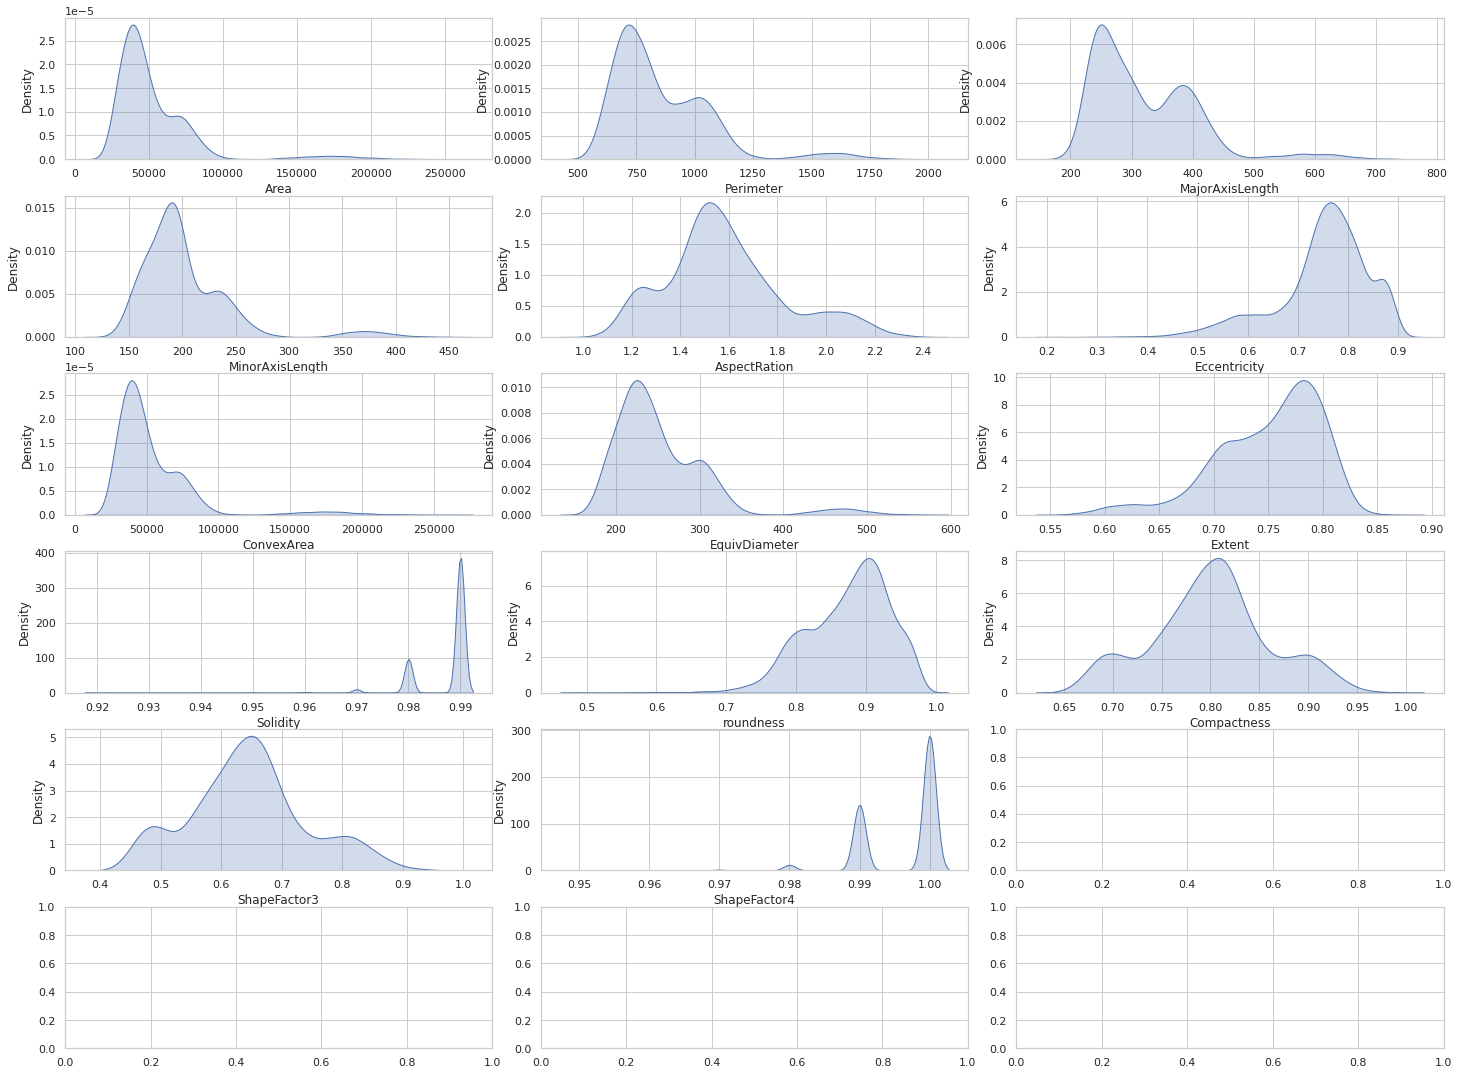

In [ ]:
figure, axes = plt.subplots(nrows=6, ncols=3)
figure.set_size_inches(20,15)
figure.tight_layout()
sns.kdeplot(dfTrainNEW['Area']                   ,shade=True, ax=axes[0][0]);
sns.kdeplot(dfTrainNEW['Perimeter']              ,shade=True, ax=axes[0][1]);
sns.kdeplot(dfTrainNEW['MajorAxisLength']        ,shade=True, ax=axes[0][2]);
sns.kdeplot(dfTrainNEW['MinorAxisLength']        ,shade=True, ax=axes[1][0]);
sns.kdeplot(dfTrainNEW['AspectRation']           ,shade=True, ax=axes[1][1]);
sns.kdeplot(dfTrainNEW['Eccentricity']           ,shade=True, ax=axes[1][2]);
sns.kdeplot(dfTrainNEW['ConvexArea']             ,shade=True, ax=axes[2][0]);
sns.kdeplot(dfTrainNEW['EquivDiameter']          ,shade=True, ax=axes[2][1]);
sns.kdeplot(dfTrainNEW['Extent']                 ,shade=True, ax=axes[2][2]);
sns.kdeplot(dfTrainNEW['Solidity']               ,shade=True, ax=axes[3][0]);
sns.kdeplot(dfTrainNEW['roundness']              ,shade=True, ax=axes[3][1]);
sns.kdeplot(dfTrainNEW['Compactness']            ,shade=True, ax=axes[3][2]);
# sns.kdeplot(dfTrainNEW['ShapeFactor1']           ,shade=True, ax=axes[4][0]);
# sns.kdeplot(dfTrainNEW['ShapeFactor2']           ,shade=True, ax=axes[4][1]);
sns.kdeplot(dfTrainNEW['ShapeFactor3']           ,shade=True, ax=axes[4][0]);
sns.kdeplot(dfTrainNEW['ShapeFactor4']           ,shade=True, ax=axes[4][1]);


## Features to Check: `y`, `Wind_Speed`,`Visibility`,`Solar_Radiation`,`Rainfall`,`Snowfall`

In [ ]:
def SkewnessCheck(df,feature):
    df=df.copy()
    df['log'+feature]   =df[feature].apply(np.log1p)
    df['sqrt'+feature]  =df[feature].apply(np.sqrt)
    df['squar'+feature] =np.power(df[feature],2)
    figure, axes = plt.subplots(nrows=1, ncols=4)
    figure.set_size_inches(20,10)
    sns.kdeplot(df[feature]          ,shade=True, ax=axes[0]);
    sns.kdeplot(df['log'+feature]    ,shade=True, ax=axes[1]);
    sns.kdeplot(df['sqrt'+feature]   ,shade=True, ax=axes[2]);
    sns.kdeplot(df['squar'+feature]  ,shade=True, ax=axes[3]);

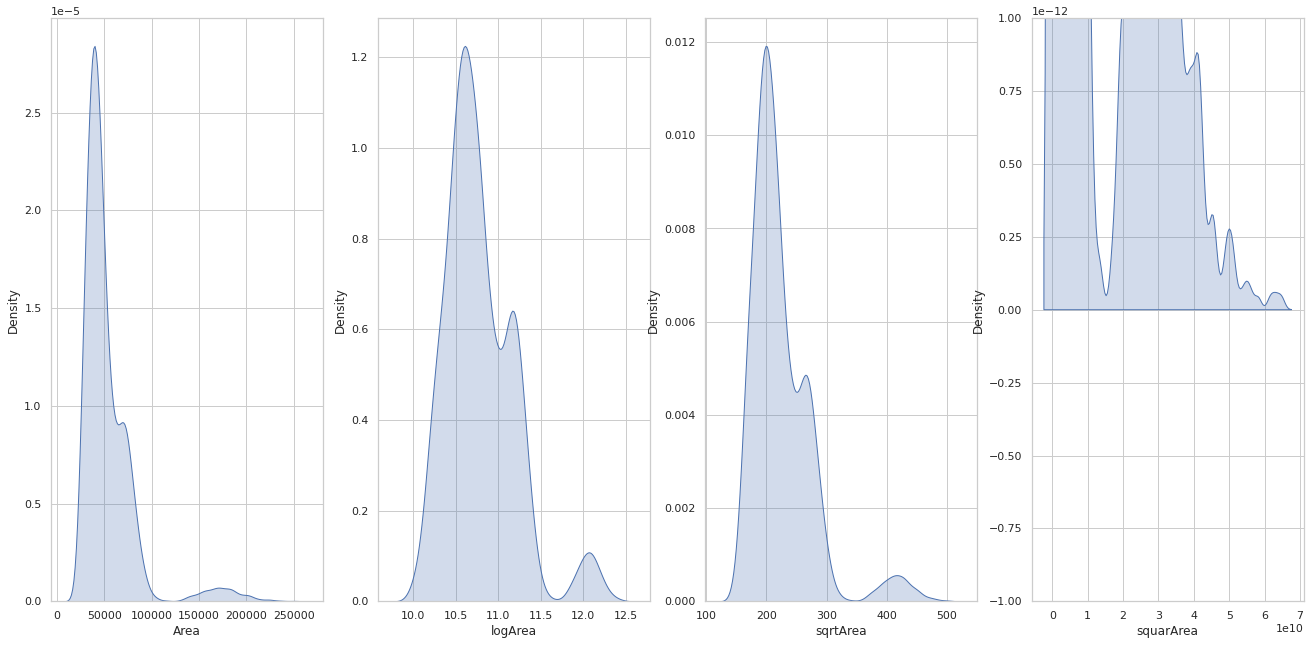

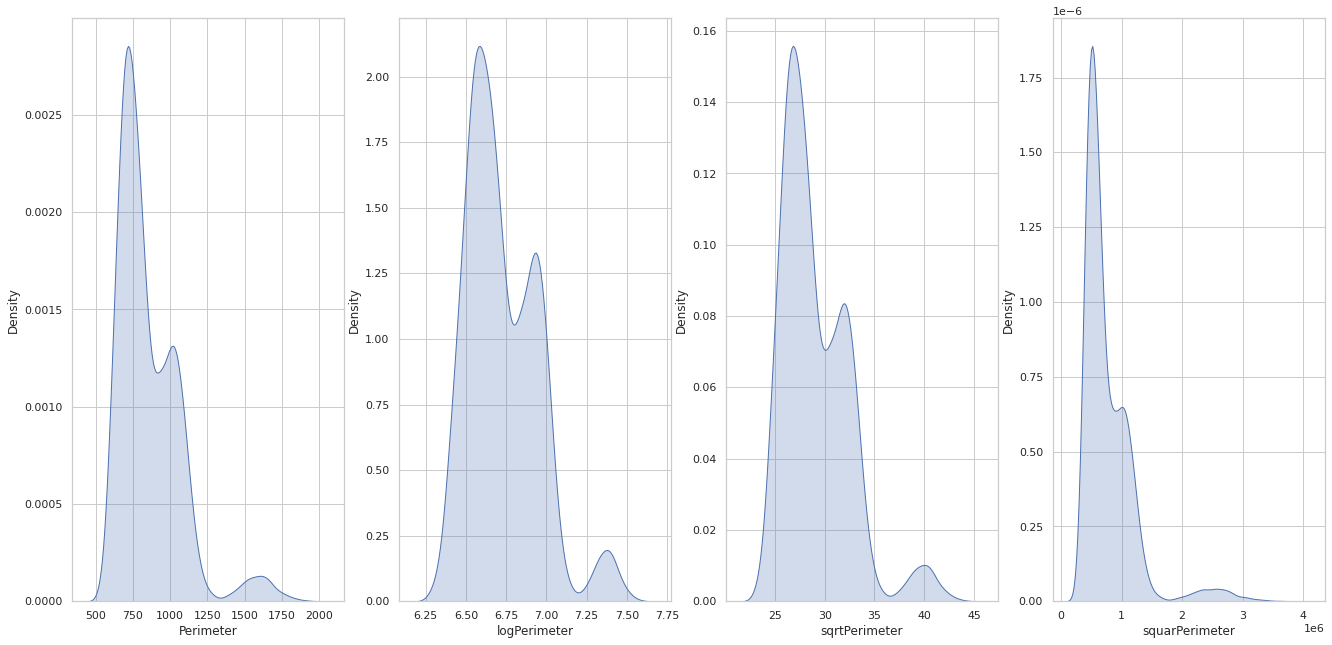

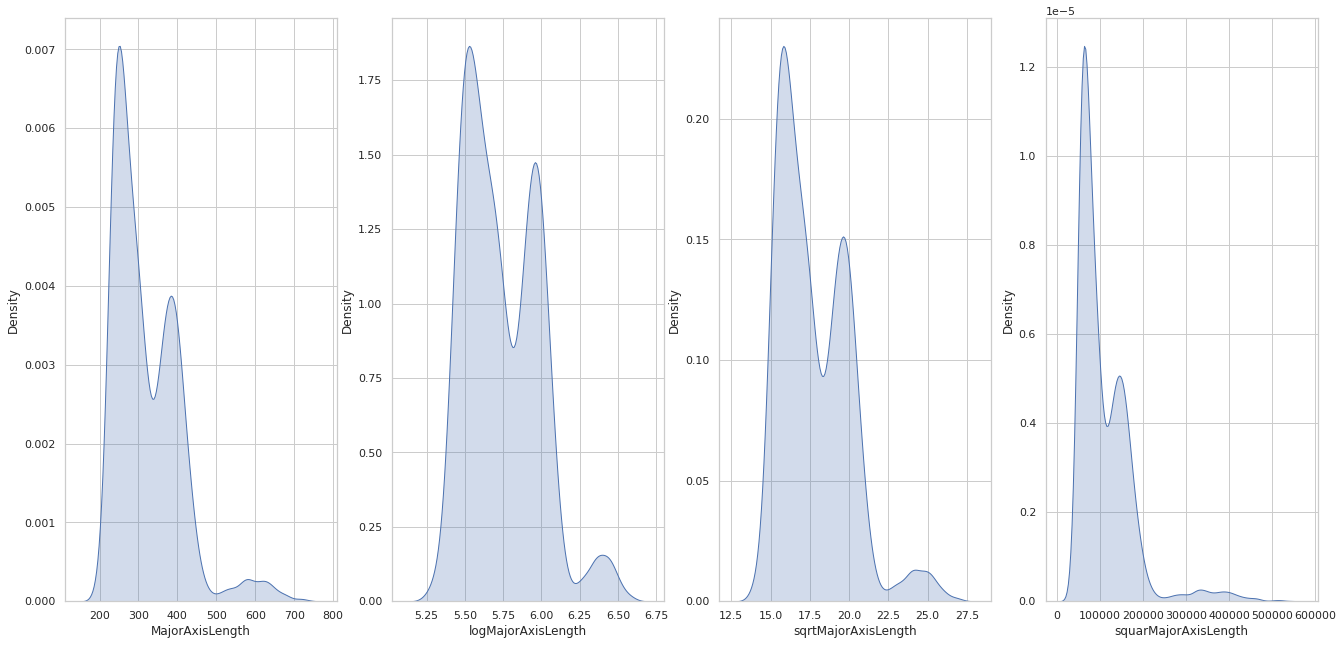

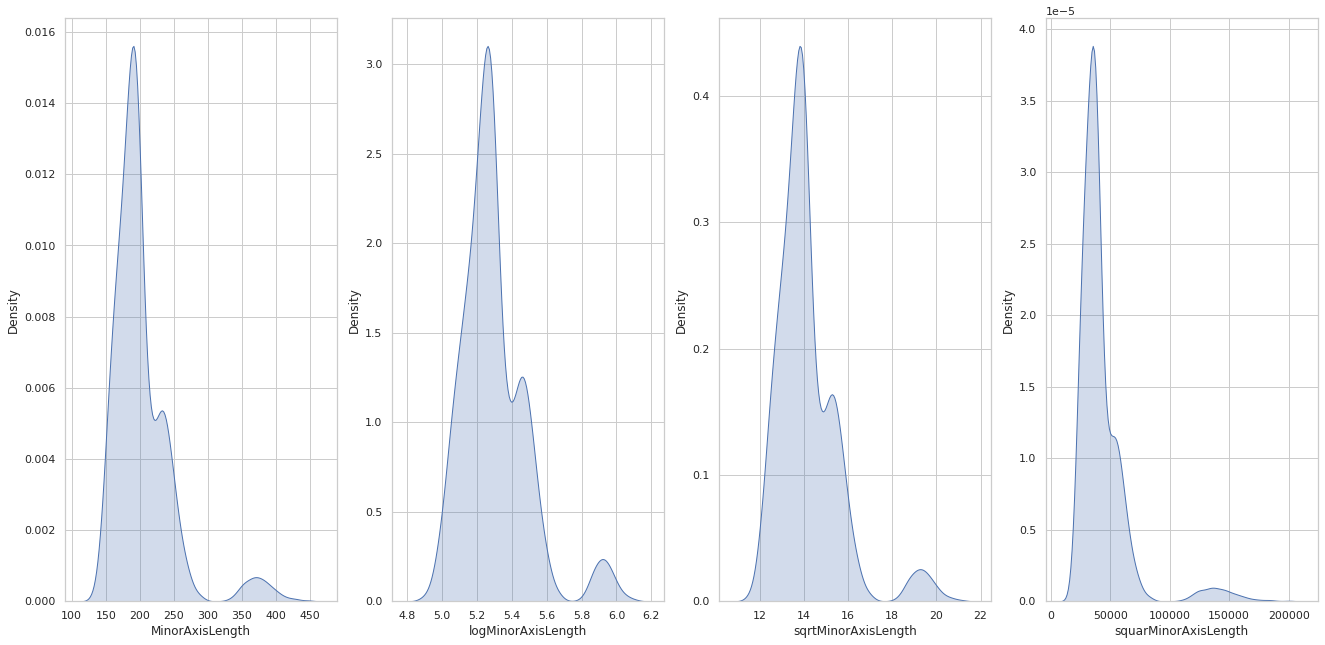

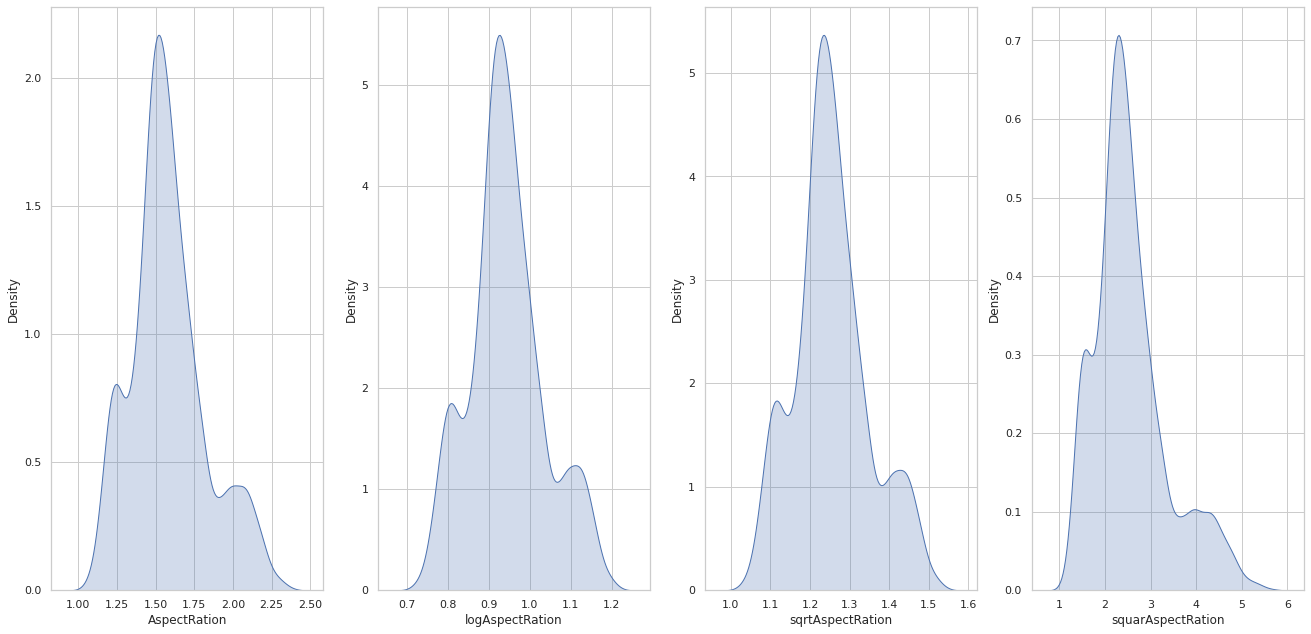

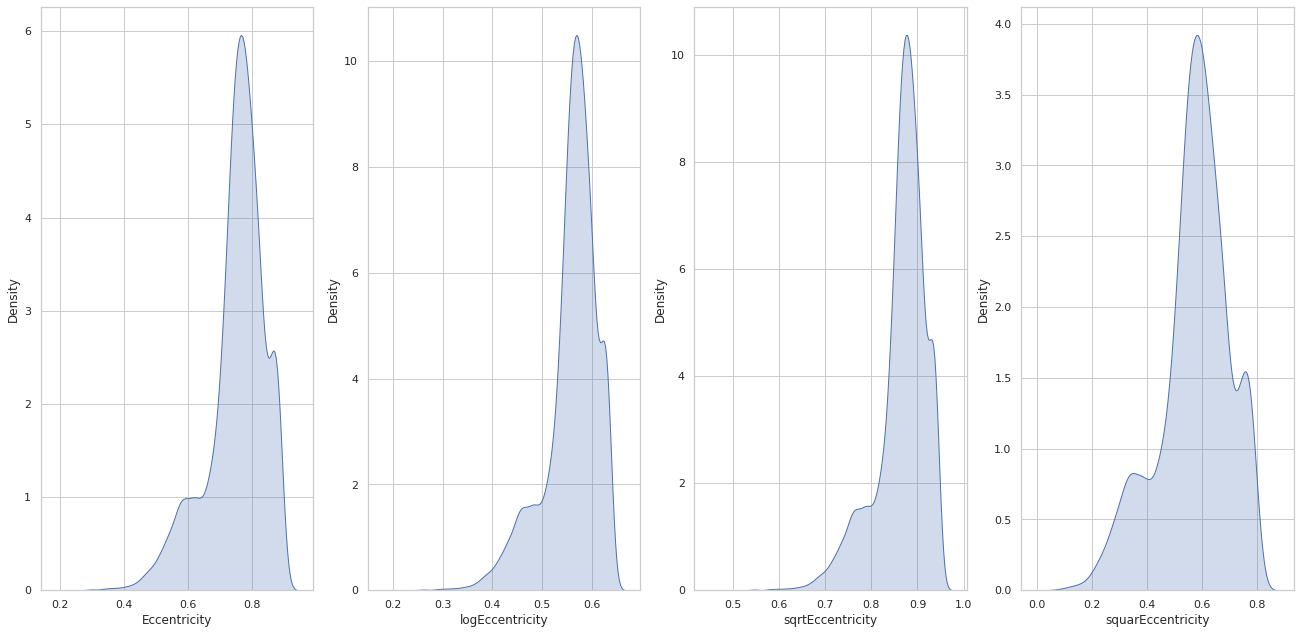

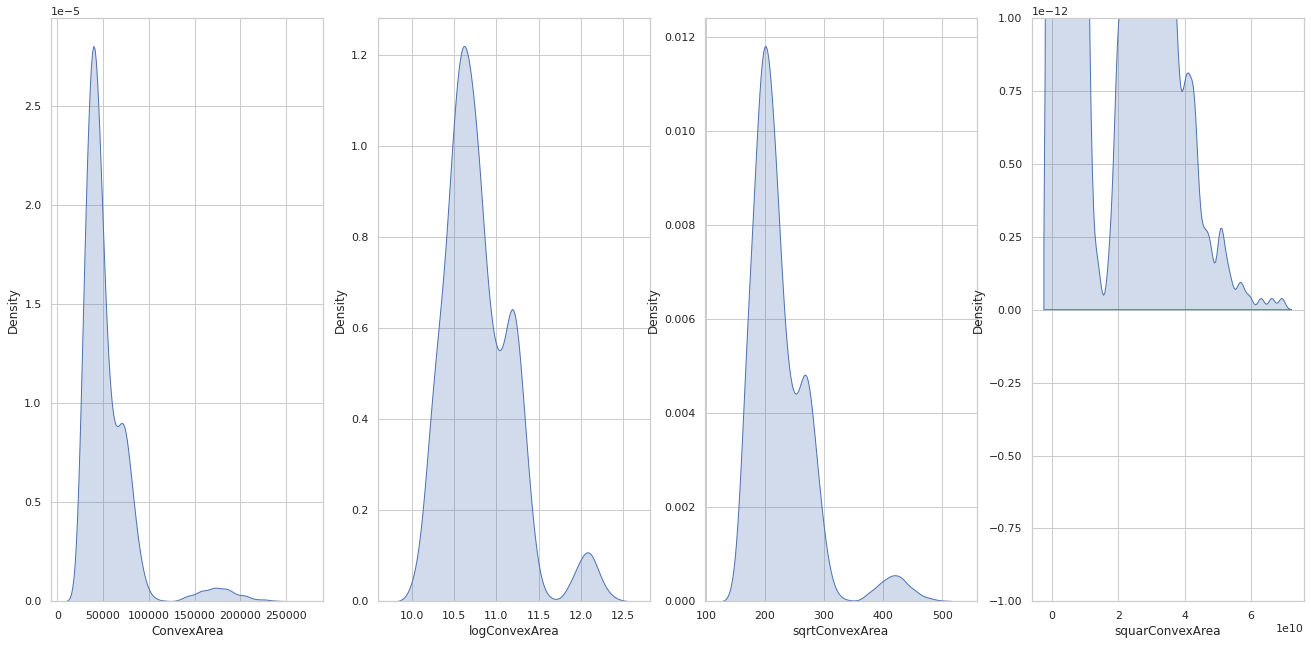

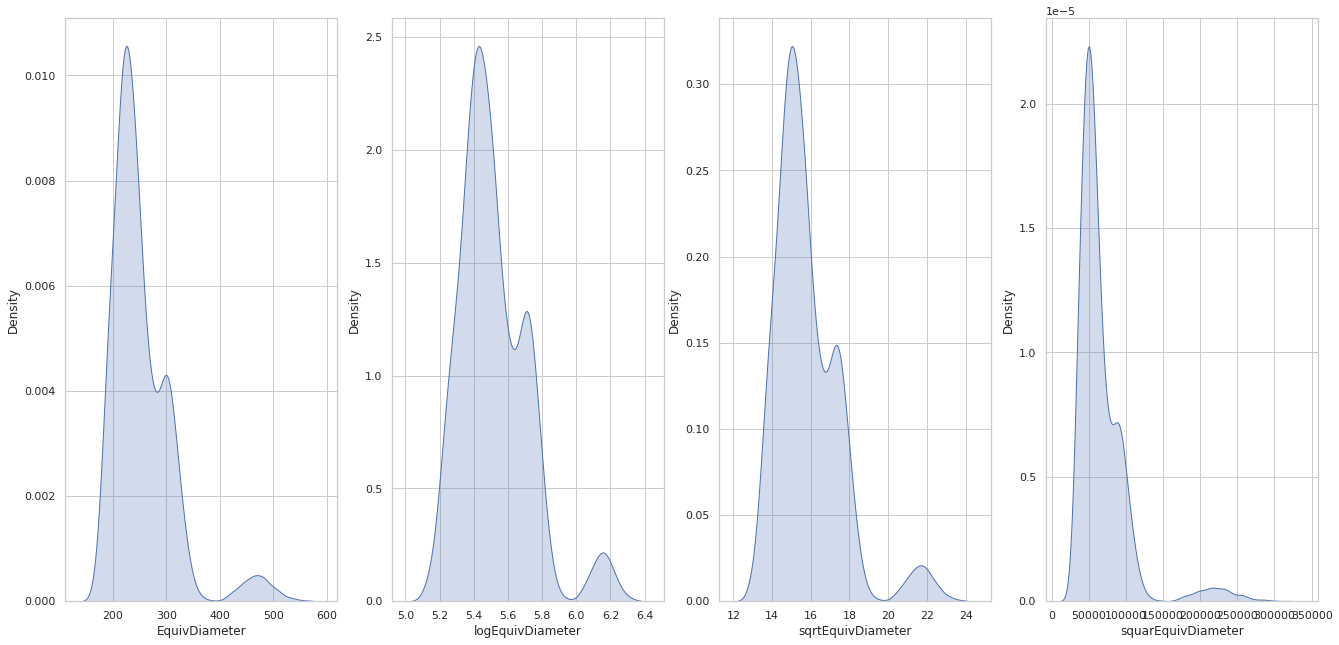

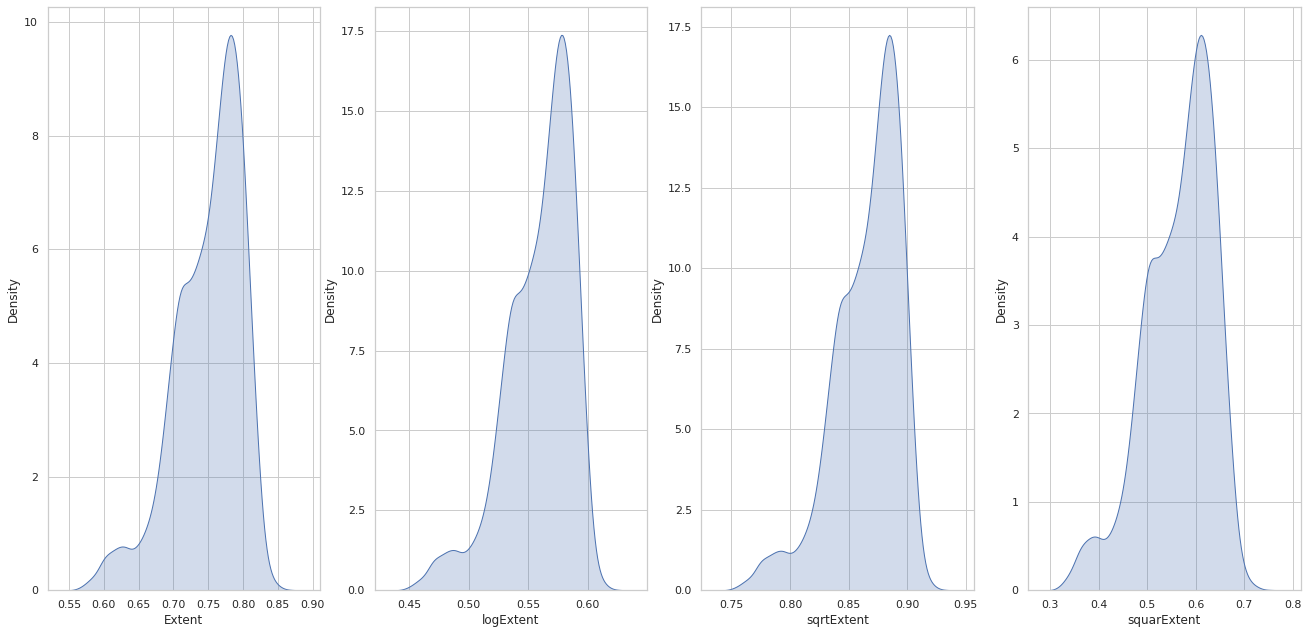

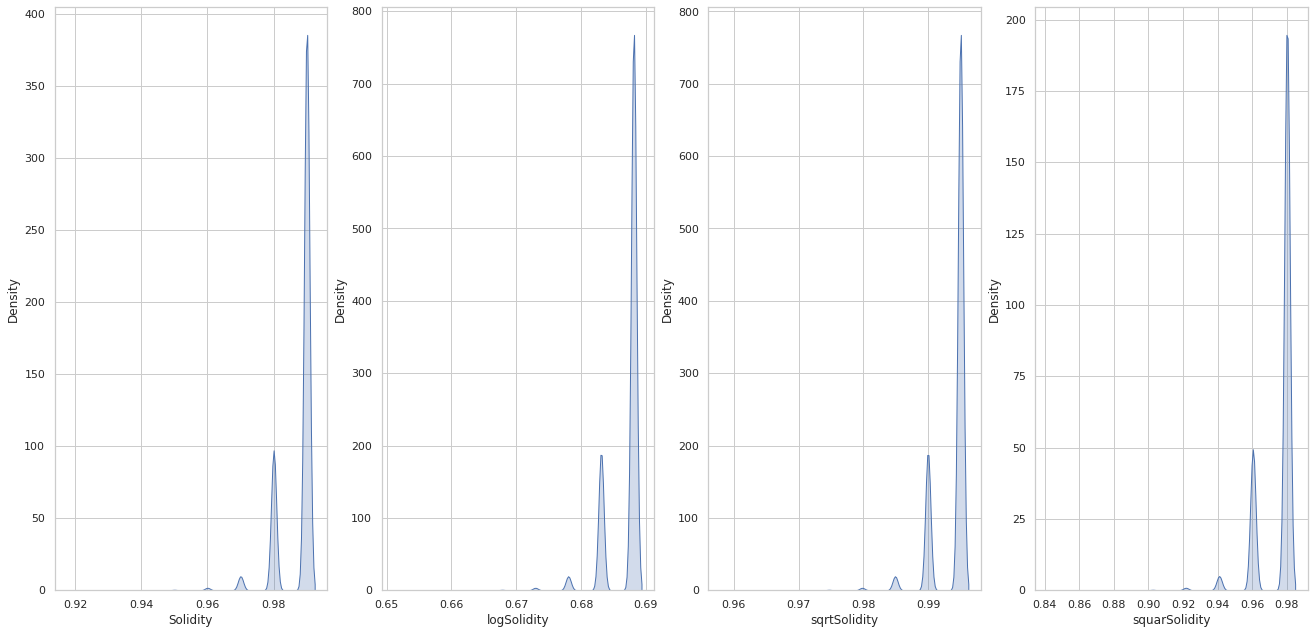

In [ ]:
for f in dfTrainNEW.columns.to_list()[1:-5]:
  SkewnessCheck(dfTrainNEW,f)

In [ ]:
dfTrainNEW.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor3', 'ShapeFactor4',
       'y'],
      dtype='object')

### Best Parameters to Use
#### `Log` Area, Premeter, MajoirAxesLength, MinorAxesLength,ConvexArea, EquivDiameter

## Apply To Train and Test Data

In [ ]:
def Convert(df,feature):
    df['log'+feature]   =df[feature].apply(np.log1p)
    

In [ ]:
featuersToconvert=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']

In [ ]:
for f in featuersToconvert:
  Convert(dfTrainNEW,f)

In [ ]:
for f in featuersToconvert:
  Convert(dfTestNEW,f)

In [ ]:
dfTrainNEW.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor3', 'ShapeFactor4',
       'y', 'logArea', 'logPerimeter', 'logMajorAxisLength',
       'logMinorAxisLength', 'logConvexArea', 'logEquivDiameter'],
      dtype='object')

In [ ]:
dfTrainNEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

In [ ]:
dfTestNEW.columns

Index(['ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor3', 'ShapeFactor4',
       'logArea', 'logPerimeter', 'logMajorAxisLength', 'logMinorAxisLength',
       'logConvexArea', 'logEquivDiameter'],
      dtype='object')

In [ ]:
dfTestNEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2709 non-null   int64  
 1   Area                2709 non-null   int64  
 2   Perimeter           2709 non-null   float64
 3   MajorAxisLength     2709 non-null   float64
 4   MinorAxisLength     2709 non-null   float64
 5   AspectRation        2709 non-null   float64
 6   Eccentricity        2709 non-null   float64
 7   ConvexArea          2709 non-null   int64  
 8   EquivDiameter       2709 non-null   float64
 9   Extent              2709 non-null   float64
 10  Solidity            2709 non-null   float64
 11  roundness           2709 non-null   float64
 12  Compactness         2709 non-null   float64
 13  ShapeFactor3        2709 non-null   float64
 14  ShapeFactor4        2709 non-null   float64
 15  logArea             2709 non-null   float64
 16  logPer

________________________________________________

## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 


In [ ]:
from sklearn.model_selection import cross_val_score,train_test_split

df_train, df_val = train_test_split(df, test_size=0.2, random_state=42)

X_train = df_train.drop(columns=['ID', 'y' , 'ShapeFactor3','Compactness','AspectRation','Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter','ShapeFactor1' ])
y_train = df_train['y']

X_val = df_val.drop(columns=['ID', 'y', 'ShapeFactor3','Compactness','AspectRation','Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter','ShapeFactor1' ])
y_val = df_val['y']


print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(8667, 7) (2167, 7) (8667,) (2167,)


# Machine Learning Model 

In [ ]:
# !sudo apt-get install build-essential swig
# !curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
# !pip install auto-sklearn

In [ ]:
# # example of auto-sklearn for the sonar classification dataset
# from pandas import read_csv
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score

In [ ]:
# !sudo apt-get install build-essential swig
# !curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
# !pip install auto-sklearn

In [ ]:
# from autosklearn.classification import AutoSklearnClassifier

In [ ]:
# !pip3 install auto-sklearn

In [ ]:
# from autosklearn.classification import AutoSklearnClassifier

In [ ]:
# data = dfTrainO.values
# X, y = data[:, :-1], data[:, -1]
# # minimally prepare dataset
# y = LabelEncoder().fit_transform(y.astype('str'))
# # split into train and test sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1)
# # define search
# model = AutoSklearnClassifier(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=8)
# # perform the search
# model.fit(X_train, y_train)
# # summarize
# print(model.sprint_statistics())
# # evaluate best model
# y_hat = model.predict(X_val)
# acc = accuracy_score(y_val, y_hat)
# print("Accuracy: %.3f" % acc)

## Train Data

In [ ]:
encoder = LabelEncoder()
encoder.fit(dfTrainNEW["y"])
encoded_Y = encoder.transform(dfTrainNEW["y"])
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

In [ ]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(dfTrainNEW, test_size=0.33, random_state=0,stratify =dfTrainNEW['y'])
X_train = train_df.drop(columns=["ID","y"])
y_train = train_df['y']
################################################################################################
X_val = val_df.drop(columns=["ID","y"])
y_val = val_df['y']

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
# y_train = np_utils.to_categorical(encoded_Y)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_val)
y_val = encoder.transform(y_val)
# convert integers to dummy variables (i.e. one hot encoded)
# y_val = np_utils.to_categorical(encoded_Y)

In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# X_train=normalize(X_train)
# X_val=normalize(X_val)
# dfTest=normalize(dfTest)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_val = scaler.transform(X_val)

# from sklearn.preprocessing import minmax_scale
# X_train = minmax_scale(X_train, feature_range=(0, 1))
# X_val = minmax_scale(X_val, feature_range=(0, 1))

# from sklearn.preprocessing import RobustScaler
# rb = RobustScaler()
# X_train= rb.fit_transform(X_train)
# X_val = rb.fit_transform(X_val)

from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
models = {
    # "LogisticRegression":           LogisticRegression(),
    "KNeighborsClassifier":         KNeighborsClassifier(), 
    "DecisionTreeClassifier":       DecisionTreeClassifier(),
    "SupportVectorMachine":         SVC(C=1.0,kernel='rbf',gamma='auto'),
    "LinearDiscriminantAnalysis":   LinearDiscriminantAnalysis(),
    "GaussianNB":                   GaussianNB(),
    "SGDClassifier":                SGDClassifier(),
    "RandomForestClassifier":       RandomForestClassifier(),
    "BaggingClassifier":            BaggingClassifier(),
    "CatBoostClassifier":           CatBoostClassifier(verbose=False),
    "LGBMClassifier":               LGBMClassifier(),
    "GradientBoostingClassifier":   GradientBoostingClassifier(),
    "XGBClassifier":                XGBClassifier()
}

In [ ]:
X_train.shape

(7258, 16)

In [ ]:
y_train.shape

(7258,)

In [ ]:
for name, model in models.items():
    print(f'Using model: {name}')
    print('-'*30)
    model.fit(X_train, y_train)
    y_trainhat = model.predict(X_train)
    y_valhat = model.predict(X_val)
    acc = accuracy_score(y_val, y_valhat)
    # print(f'Train_Report: {classification_report(y_train,y_trainhat)}')
    print(f'Train_Accuracy: {accuracy_score(y_train,y_trainhat)}')
    # print(f'Validation_Report: {classification_report(y_val,y_valhat)}')
    print(f'Validation_Accuracy: {accuracy_score(y_val,y_valhat)}')
    print('**'*30)

Using model: KNeighborsClassifier
------------------------------
Train_Accuracy: 0.9400661339211904
Validation_Accuracy: 0.9222595078299777
************************************************************
Using model: DecisionTreeClassifier
------------------------------
Train_Accuracy: 1.0
Validation_Accuracy: 0.8853467561521253
************************************************************
Using model: SupportVectorMachine
------------------------------
Train_Accuracy: 0.9305593827500689
Validation_Accuracy: 0.9286912751677853
************************************************************
Using model: LinearDiscriminantAnalysis
------------------------------
Train_Accuracy: 0.9032791402590246
Validation_Accuracy: 0.9024049217002237
************************************************************
Using model: GaussianNB
------------------------------
Train_Accuracy: 0.8929457150730229
Validation_Accuracy: 0.8959731543624161
************************************************************
Using model:

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

Train_Accuracy: 0.9900799118214384
Validation_Accuracy: 0.9284116331096197
************************************************************
Using model: LGBMClassifier
------------------------------
Train_Accuracy: 0.9987599889776798
Validation_Accuracy: 0.9258948545861297
************************************************************
Using model: GradientBoostingClassifier
------------------------------
Train_Accuracy: 0.968861945439515
Validation_Accuracy: 0.9236577181208053
************************************************************
Using model: XGBClassifier
------------------------------
Train_Accuracy: 0.9464039680352714
Validation_Accuracy: 0.9278523489932886
************************************************************


## Test Data

In [ ]:
# ############################################
# TestYTrue= pd.read_csv("yTest.csv")
# yTrueTest=TestYTrue["y"]
# ############################################

ID=dfTestO["ID"]
X_test = dfTestO.drop(columns=['ID'])

X_test=scaler.transform(X_test)



In [ ]:
Model=CatBoostClassifier(iterations=700, learning_rate=0.2,verbose=False)
Model.fit(X_train, y_train)

y_trainhat = Model.predict(X_train)
y_valhat = Model.predict(X_val)
acc = accuracy_score(y_val, y_valhat)
# print(f'Train_Report: {classification_report(y_train,y_trainhat)}')
print(f'Train_Accuracy: {accuracy_score(y_train,y_trainhat)}')
# print(f'Validation_Report: {classification_report(y_val,y_valhat)}')
print(f'Validation_Accuracy: {accuracy_score(y_val,y_valhat)}')
print('**'*30)

Train_Accuracy: 0.9973821989528796
Validation_Accuracy: 0.9264541387024608
************************************************************


In [ ]:
y_test_predicted = Model.predict(X_test)

dfTestO['y'] = y_test_predicted

dfTestO.drop(columns="ID",inplace=True)
dfTest=pd.concat([dfTestO, ID],axis=1)

#dfTestEncoded2[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)
dfTest[['ID', 'y']].to_csv('submission.csv', index=False)

__________________________________________________

# DeepLearning

In [ ]:
from keras.utils import np_utils

In [ ]:
x=dfTrainNEW.drop(columns=["ID","y"])

In [ ]:
yData=dfTrainNEW['y']

In [ ]:
yData

0           HOROZ
1           SEKER
2        DERMASON
3        DERMASON
4            SIRA
           ...   
10829       SEKER
10830    DERMASON
10831        CALI
10832        SIRA
10833    DERMASON
Name: y, Length: 10834, dtype: object

In [ ]:
encoder = LabelEncoder()
encoder.fit(yData)


LabelEncoder()

In [ ]:
encoder = LabelEncoder()
encoder.fit(yData)
encoded_Y = encoder.transform(yData)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

In [ ]:
encoded_Y

array([4, 5, 3, ..., 2, 6, 3])

In [ ]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# # define baseline model
# def baseline_model():
# 	# create model
# 	model = Sequential()
#   model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
#   model.add(Dropout(0.2))
#   model.add(Dense(512, activation='relu'))
#   model.add(Dense(y.shape[1], activation='softmax'))
# 	# Compile model
# 	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 	return model

In [ ]:
# estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=32, verbose=0)
# kfold = KFold(n_splits=10, shuffle=True)
# results = cross_val_score(estimator, X, dummy_y, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=42,stratify =yData)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_val= sc.transform(x_val)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [ ]:
x.shape

(10834, 20)

In [ ]:
x.shape[1]

20

In [ ]:
y.shape

(10834, 7)

In [ ]:
y.shape[1]

7

In [ ]:
x_train.shape

(8667, 20)

In [ ]:
x_train

array([[ 1.10263228,  1.16713   ,  1.30978886, ...,  1.30546099,
         1.40870655,  1.40466057],
       [-0.2103898 , -0.01752077,  0.33041051, ..., -0.7287366 ,
        -0.06125002, -0.06213303],
       [ 0.15757597,  0.19342844,  0.0436519 , ...,  0.73594407,
         0.44453208,  0.44490037],
       ...,
       [-0.62024171, -0.80190055, -1.04394828, ..., -0.16230688,
        -0.78932965, -0.78726285],
       [-0.25462184, -0.06577377,  0.33731331, ..., -0.89922211,
        -0.1334309 , -0.13068688],
       [-0.22558712, -0.21352229, -0.13991573, ..., -0.15905927,
        -0.0926566 , -0.0853458 ]])

## Defining the model structure

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               5376      
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 7)                 3591      
Total params: 403,207
Trainable params: 403,207
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 10,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=100)

## Training the model

In [ ]:
history = model.fit(x=x_train, y=y_train, epochs=500, callbacks=[lrd, mcp, es], batch_size=32, validation_split=0.1)

Epoch 1/500
244/244 [==============================] - 3s 9ms/step - loss: 0.3613 - accuracy: 0.8688 - val_loss: 0.2453 - val_accuracy: 0.9100
Epoch 2/500
244/244 [==============================] - 2s 9ms/step - loss: 0.2655 - accuracy: 0.9047 - val_loss: 0.2028 - val_accuracy: 0.9285
Epoch 3/500
244/244 [==============================] - 2s 9ms/step - loss: 0.2490 - accuracy: 0.9129 - val_loss: 0.2292 - val_accuracy: 0.9146
Epoch 4/500
244/244 [==============================] - 2s 9ms/step - loss: 0.2401 - accuracy: 0.9119 - val_loss: 0.2723 - val_accuracy: 0.8962
Epoch 5/500
244/244 [==============================] - 2s 9ms/step - loss: 0.2420 - accuracy: 0.9133 - val_loss: 0.2266 - val_accuracy: 0.9216
Epoch 6/500
244/244 [==============================] - 2s 9ms/step - loss: 0.2322 - accuracy: 0.9183 - val_loss: 0.1887 - val_accuracy: 0.9262
Epoch 7/500
244/244 [==============================] - 2s 9ms/step - loss: 0.2310 - accuracy: 0.9174 - val_loss: 0.2185 - val_accuracy: 0.9204

## Testing & evaluating the model

In [ ]:
y_pred = np.argmax(model.predict(x_val), axis=-1)
y_pred 

array([3, 3, 3, ..., 4, 6, 3])

In [ ]:
y_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(x_val), axis=-1)[10]

3

In [ ]:
yData.iloc[10]

'BARBUNYA'

In [ ]:
model.evaluate(x_val, y_val)

68/68 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.9114


[0.367538720369339, 0.9113982319831848]

In [ ]:
y_pred

array([3, 3, 3, ..., 4, 6, 3])

## Visualize Loss

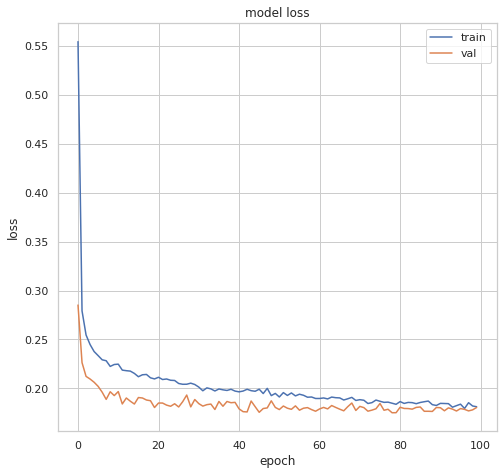

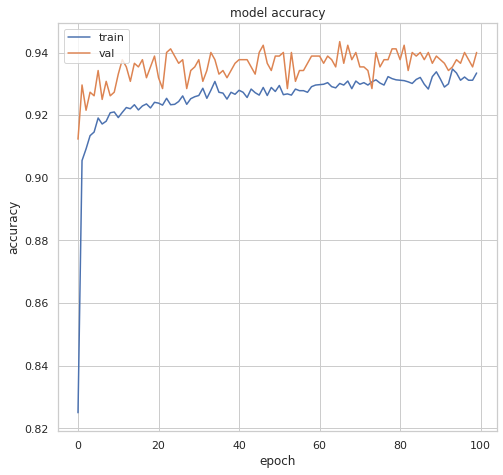

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## True Test

In [ ]:
dftest=pd.read_csv("testTrue.csv")

In [ ]:
dftest['y'].unique()

array(['DERMASON', 'BOMBAY', 'SIRA', 'SEKER', 'BARBUNYA', 'HOROZ', 'CALI'],
      dtype=object)

In [ ]:
for f in featuersToconvert:
  Convert(dftest,f)

In [ ]:
df_YTrue=dftest["y"]
df_YTrue

0       DERMASON
1         BOMBAY
2           SIRA
3          SEKER
4       BARBUNYA
          ...   
2718        SIRA
2719       SEKER
2720       HOROZ
2721        CALI
2722    DERMASON
Name: y, Length: 2723, dtype: object

In [ ]:
encoder = LabelEncoder()
encoder.fit(df_YTrue)
encoded_Y = encoder.transform(df_YTrue)
# convert integers to dummy variables (i.e. one hot encoded)
ytest = np_utils.to_categorical(encoded_Y)

In [ ]:
ytest

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# dftest = pd.get_dummies(dftest, columns=['y'])
# dftest

In [ ]:
xtest = dftest.drop(columns="y")

In [ ]:
xtest.shape

(2723, 22)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(xtest)
xtest = sc.transform(xtest)

In [ ]:
y_pred2 = np.argmax(model.predict(xtest), axis=-1)
y_pred2

array([3, 1, 6, ..., 4, 2, 3])

In [ ]:
dfyPred = pd.DataFrame(y_pred2, columns = ["yPred"])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==0), 'BARBUNYA',dfyPred['yPred'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==1), 'BOMBAY',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==2), 'CALI',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==3), 'DERMASON',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==4), 'HOROZ',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==5), 'SEKER',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==6), 'SIRA',dfyPred['yPredNew'])
dfyPred['result'] = dfyPred['yPredNew'].map(lambda x: x.lstrip('y_'))
dfyPred=dfyPred["result"]
dfyPred

0       DERMASON
1         BOMBAY
2           SIRA
3          SEKER
4       BARBUNYA
          ...   
2718        SIRA
2719       SEKER
2720       HOROZ
2721        CALI
2722    DERMASON
Name: result, Length: 2723, dtype: object

In [ ]:
model.evaluate(xtest, ytest)

86/86 [==============================] - 0s 2ms/step - loss: 0.1666 - accuracy: 0.9357


[0.16655640304088593, 0.9357326626777649]

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, plot_confusion_matrix

In [ ]:
accuracy_score(df_YTrue,dfyPred)

0.9357326478149101

In [ ]:
print(confusion_matrix(df_YTrue,dfyPred))

[[244   0  12   0   1   2   6]
 [  0 104   0   0   0   0   0]
 [  5   0 311   0   6   2   2]
 [  0   0   0 659   0   9  41]
 [  1   0   3   6 368   0   8]
 [  1   0   0   6   0 388  11]
 [  1   0   1  41   6   4 474]]


In [ ]:
print(classification_report(df_YTrue,dfyPred))

              precision    recall  f1-score   support

    BARBUNYA       0.97      0.92      0.94       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.95      0.95      0.95       326
    DERMASON       0.93      0.93      0.93       709
       HOROZ       0.97      0.95      0.96       386
       SEKER       0.96      0.96      0.96       406
        SIRA       0.87      0.90      0.89       527

    accuracy                           0.94      2723
   macro avg       0.95      0.94      0.95      2723
weighted avg       0.94      0.94      0.94      2723



In [ ]:
print("Number of mislabeled points out of a total %d points : %d"% (xtest.shape[0], (df_YTrue != dfyPred).sum()))

Number of mislabeled points out of a total 2723 points : 175


_________________________________________________________

## Our Test

In [ ]:
dfTestNEW.sample(5)

ID   Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
2392  13226  71275    1008.78           371.78           245.30          1.52   
401   11235  70938    1032.17           405.47           225.06          1.80   
2275  13109  39318     746.92           279.82           179.45          1.56   
2162  12996  45370     811.37           303.64           190.90          1.59   
1290  12124  78417    1114.52           403.69           248.81          1.62   

      Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  roundness  \
2392          0.75       72348         301.25    0.79      0.99       0.88   
401           0.83       71739         300.53    0.79      0.99       0.84   
2275          0.77       39764         223.74    0.79      0.99       0.89   
2162          0.78       45998         240.35    0.71      0.99       0.87   
1290          0.79       79804         315.98    0.69      0.98       0.79   

      Compactness  ShapeFactor3  ShapeFactor4    logArea  logPerimeter  \
2392         0.81          0.66          1.00  11.174315      6.917488   
401          0.74          0.55          0.99  11.169576      6.940387   
2275         0.80          0.64          1.00  10.579463      6.617296   
2162         0.79          0.63          1.00  10.722628      6.699956   
1290         0.78          0.61          0.99  11.269809      7.017076   

      logMajorAxisLength  logMinorAxisLength  logConvexArea  logEquivDiameter  
2392            5.920988            5.506550      11.189257          5.711254  
401             6.007510            5.420800      11.180804          5.708870  
2275            5.637714            5.195454      10.590742          5.414944  
2162            5.719131            5.256974      10.736375          5.486248  
1290            6.003121            5.520701      11.287341          5.758839

In [ ]:
ID=dfTestNEW["ID"]

In [ ]:
xtest=dfTestNEW.drop(columns=['ID'])
xtest

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      57659     955.43           387.76           196.63          1.97   
1      28772     630.36           229.99           159.61          1.44   
2      54677     911.02           308.85           226.40          1.36   
3      24827     578.30           214.19           147.79          1.45   
4     141850    1432.85           524.92           346.91          1.51   
...      ...        ...              ...              ...           ...   
2704   66833    1018.34           400.40           214.35          1.87   
2705   40572     725.33           250.71           206.47          1.21   
2706   61226    1008.38           408.23           199.39          2.05   
2707   34238     698.85           255.83           170.87          1.50   
2708   49175     828.60           310.35           202.33          1.53   

      Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  roundness  \
0             0.86       60188         270.95    0.62      0.96       0.79   
1             0.72       29127         191.40    0.77      0.99       0.91   
2             0.68       55858         263.85    0.75      0.98       0.83   
3             0.72       25121         177.79    0.72      0.99       0.93   
4             0.75      143680         424.98    0.80      0.99       0.87   
...            ...         ...            ...     ...       ...        ...   
2704          0.84       67787         291.71    0.76      0.99       0.81   
2705          0.57       40900         227.28    0.77      0.99       0.97   
2706          0.87       63901         279.20    0.61      0.96       0.76   
2707          0.74       34724         208.79    0.72      0.99       0.88   
2708          0.76       49668         250.22    0.80      0.99       0.90   

      Compactness  ShapeFactor3  ShapeFactor4    logArea  logPerimeter  \
0            0.70          0.49          0.96  10.962319      6.863208   
1            0.83          0.69          1.00  10.267193      6.447876   
2            0.85          0.73          1.00  10.909217      6.815662   
3            0.83          0.69          1.00  10.119727      6.361820   
4            0.81          0.66          0.99  11.862532      7.268118   
...           ...           ...           ...        ...           ...   
2704         0.73          0.53          0.99  11.109967      6.926911   
2705         0.91          0.82          1.00  10.610858      6.588004   
2706         0.68          0.47          0.96  11.022344      6.917092   
2707         0.82          0.67          1.00  10.441121      6.550866   
2708         0.81          0.65          1.00  10.803161      6.720944   

      logMajorAxisLength  logMinorAxisLength  logConvexArea  logEquivDiameter  
0               5.962962            5.286397      11.005245          5.605618  
1               5.442374            5.078979      10.279455          5.259577  
2               5.736088            5.426711      10.930586          5.579164  
3               5.371521            5.002536      10.131499          5.186212  
4               6.265149            5.851944      11.875351          6.054392  
...                  ...                 ...            ...               ...  
2704            5.994958            5.372265      11.124140          5.679182  
2705            5.528278            5.334987      10.618910          5.430573  
2706            6.014277            5.300265      11.065106          5.635504  
2707            5.548414            5.146738      10.455215          5.346107  
2708            5.740918            5.314830      10.813136          5.526329  

[2709 rows x 20 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(xtest)
xtest = sc.transform(xtest)

In [ ]:
y_pred2 = np.argmax(model.predict(xtest), axis=-1)
y_pred2

array([4, 3, 0, ..., 4, 3, 6])

In [ ]:
dfyPred = pd.DataFrame(y_pred2, columns = ["yPred"])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==0), 'BARBUNYA',dfyPred['yPred'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==1), 'BOMBAY'  ,dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==2), 'CALI'    ,dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==3), 'DERMASON',dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==4), 'HOROZ'   ,dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==5), 'SEKER'   ,dfyPred['yPredNew'])
dfyPred['yPredNew']      = np.where((dfyPred['yPred']==6), 'SIRA',   dfyPred['yPredNew'])

dfyPred=dfyPred["yPredNew"]
dfyPred

0          HOROZ
1       DERMASON
2       BARBUNYA
3       DERMASON
4         BOMBAY
          ...   
2704        CALI
2705       SEKER
2706       HOROZ
2707    DERMASON
2708        SIRA
Name: yPredNew, Length: 2709, dtype: object

In [ ]:
dfTestNEW['y'] = dfyPred

In [ ]:
dfTestNEW

ID    Area  Perimeter  MajorAxisLength  MinorAxisLength  \
0     10834   57659     955.43           387.76           196.63   
1     10835   28772     630.36           229.99           159.61   
2     10836   54677     911.02           308.85           226.40   
3     10837   24827     578.30           214.19           147.79   
4     10838  141850    1432.85           524.92           346.91   
...     ...     ...        ...              ...              ...   
2704  13538   66833    1018.34           400.40           214.35   
2705  13539   40572     725.33           250.71           206.47   
2706  13540   61226    1008.38           408.23           199.39   
2707  13541   34238     698.85           255.83           170.87   
2708  13542   49175     828.60           310.35           202.33   

      AspectRation  Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  \
0             1.97          0.86       60188         270.95    0.62      0.96   
1             1.44          0.72       29127         191.40    0.77      0.99   
2             1.36          0.68       55858         263.85    0.75      0.98   
3             1.45          0.72       25121         177.79    0.72      0.99   
4             1.51          0.75      143680         424.98    0.80      0.99   
...            ...           ...         ...            ...     ...       ...   
2704          1.87          0.84       67787         291.71    0.76      0.99   
2705          1.21          0.57       40900         227.28    0.77      0.99   
2706          2.05          0.87       63901         279.20    0.61      0.96   
2707          1.50          0.74       34724         208.79    0.72      0.99   
2708          1.53          0.76       49668         250.22    0.80      0.99   

      roundness  Compactness  ShapeFactor3  ShapeFactor4    logArea  \
0          0.79         0.70          0.49          0.96  10.962319   
1          0.91         0.83          0.69          1.00  10.267193   
2          0.83         0.85          0.73          1.00  10.909217   
3          0.93         0.83          0.69          1.00  10.119727   
4          0.87         0.81          0.66          0.99  11.862532   
...         ...          ...           ...           ...        ...   
2704       0.81         0.73          0.53          0.99  11.109967   
2705       0.97         0.91          0.82          1.00  10.610858   
2706       0.76         0.68          0.47          0.96  11.022344   
2707       0.88         0.82          0.67          1.00  10.441121   
2708       0.90         0.81          0.65          1.00  10.803161   

      logPerimeter  logMajorAxisLength  logMinorAxisLength  logConvexArea  \
0         6.863208            5.962962            5.286397      11.005245   
1         6.447876            5.442374            5.078979      10.279455   
2         6.815662            5.736088            5.426711      10.930586   
3         6.361820            5.371521            5.002536      10.131499   
4         7.268118            6.265149            5.851944      11.875351   
...            ...                 ...                 ...            ...   
2704      6.926911            5.994958            5.372265      11.124140   
2705      6.588004            5.528278            5.334987      10.618910   
2706      6.917092            6.014277            5.300265      11.065106   
2707      6.550866            5.548414            5.146738      10.455215   
2708      6.720944            5.740918            5.314830      10.813136   

      logEquivDiameter         y  
0             5.605618     HOROZ  
1             5.259577  DERMASON  
2             5.579164  BARBUNYA  
3             5.186212  DERMASON  
4             6.054392    BOMBAY  
...                ...       ...  
2704          5.679182      CALI  
2705          5.430573     SEKER  
2706          5.635504     HOROZ  
2707          5.346107  DERMASON  
2708          5.526329      SIRA  

[2709 rows x 22 colu

In [ ]:
dfTestNEW.drop(columns="ID",inplace=True)
dfTestNEW=pd.concat([dfTestNEW, ID],axis=1)

#dfTestNEW[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)
dfTestNEW[['ID', 'y']].to_csv('submission.csv', index=False)

__________________________